# LEAD SCORING CASE STUDY

### Project Group Members:  Antarlin Chanda,Anuj Bhatia,Sukanya Sarkar

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

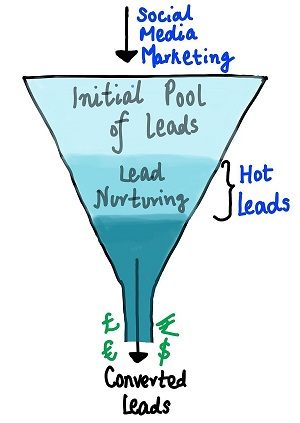

In [2109]:
from IPython.display import Image
Image(filename="E:\MS in Data Science\MS-DataScience\Module Lead Scoring Case Study\XNote_201901081613670.jpg")

As we can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, we need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed us to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

### Goals of the Case Study

- Build a ***logistic regression model*** model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Import Libraries

In [2110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Filter Out Warnings

In [2111]:
from sklearn.preprocessing import StandardScaler

In [2112]:
#importing dataset to csv

leads=pd.read_csv("E:\MS in Data Science\MS-DataScience\Module Lead Scoring Case Study\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Check Dataset Attributes

In [2113]:
# Dataset info
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [2114]:
#checking dataset shape
leads.shape

(9240, 37)

This dataset has:
- 9240 rows,
- 37 columns

In [2115]:
# Descriptive Statistics
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [2116]:
# Only 7 columns are numerical so we got descriptive statistics for those

In [2117]:
# pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
# pd.set_option('display.width', 1000)

In [2118]:
leads.describe(include='object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


## EXPLORATORY DATA ANALYSIS

## Data Cleaning & Treatment:

### Check No. of Unique values in each columns

In [2119]:
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [2120]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Insight

### We find that leads id and prospect number are just id variables which are used seperately identify each line item/transaction.
### So we can drop them

In [2121]:
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

C:\Users\antar\AppData\Local\Temp\ipykernel_22940\1994502933.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)


In [2122]:
# As mentioned in problem Data section we have 'Select' value in many of the categorical variables. This was possibly an optional field and user didnt fill the columns so it came as is.
# We need to handle this value.

In [2123]:
#Converting 'Select' values to NaN.

leads = leads.replace('Select', np.nan)

### Missing Value Check

In [2124]:
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [2125]:
#Percentage of null values in each column
round(100*(leads.isnull().sum()/len(leads)), 1)

Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
How did you hear about X Education               78.5
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

In [2126]:
round(100*(leads.isnull().sum()/len(leads)), 1)>40

Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                   False
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper Article                                False
X Education Forums                               False
Newspaper 

In [2127]:
# We decide to drop variables with more than 40 percent values missing
col_drop=list(round(100*(leads.isnull().sum()/len(leads)), 1)[round(100*(leads.isnull().sum()/len(leads)), 1)>40].index)
leads.drop(col_drop, 1, inplace = True)

C:\Users\antar\AppData\Local\Temp\ipykernel_22940\948962137.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  leads.drop(col_drop, 1, inplace = True)


In [2128]:
# Recheck Missing Value Shares
round(100*(leads.isnull().sum()/len(leads)), 1)

Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement       

## Categorical Variable Analysis:

In [2129]:
leads.select_dtypes('object').columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [2130]:
for i in leads.select_dtypes('object').columns:
    print(leads[i].value_counts())

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page V

In [2131]:
# Checking unique value counts per categorical columns

In [2132]:
for i in leads.select_dtypes('object').columns:
    print(i,len(leads[i].value_counts()))

Lead Origin 5
Lead Source 21
Do Not Email 2
Do Not Call 2
Last Activity 17
Country 38
Specialization 18
What is your current occupation 6
What matters most to you in choosing a course 3
Search 2
Magazine 1
Newspaper Article 2
X Education Forums 2
Newspaper 2
Digital Advertisement 2
Through Recommendations 2
Receive More Updates About Our Courses 1
Tags 26
Update me on Supply Chain Content 1
Get updates on DM Content 1
City 6
I agree to pay the amount through cheque 1
A free copy of Mastering The Interview 2
Last Notable Activity 16


In [2133]:
# As observed above in value_counts for the variables, most variables its a skewed distribution with some categories being very important while others much less so.

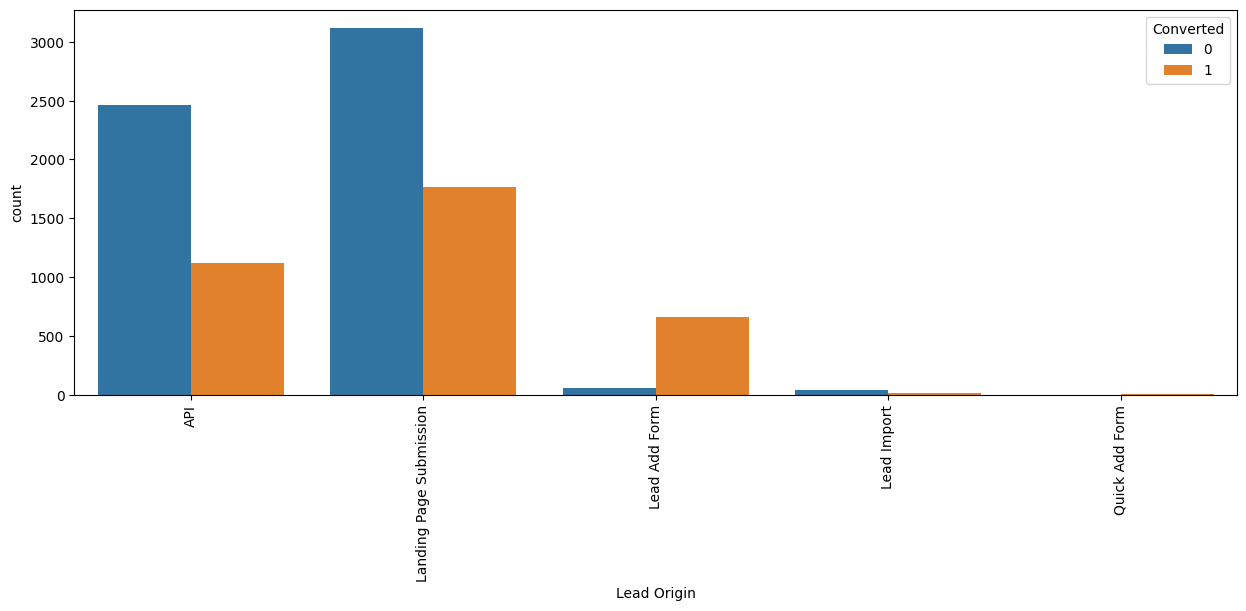

In [2134]:
# Plotting Lead Origin Column
plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['Lead Origin'].astype('str'), hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.xticks(rotation=90)
plt.show()

In [2135]:
# We found most leads originated from API abd Landing Form Submission.Lead Add Form is higest Yielding in terms of conversion rates.

In [2136]:
leads['Lead Source']

0           Olark Chat
1       Organic Search
2       Direct Traffic
3       Direct Traffic
4               Google
             ...      
9235    Direct Traffic
9236    Direct Traffic
9237    Direct Traffic
9238            Google
9239    Direct Traffic
Name: Lead Source, Length: 9240, dtype: object

In [2137]:
#checking value counts of Lead Source column

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [2138]:
# Replacong Values of Lead Source with appropriate changes
leads['Lead Source']=leads['Lead Source'].replace(['google'],'Google')
leads['Lead Source']=leads['Lead Source'].replace([np.NaN,'bing','Click2call','Press_Release','Social Media','Live Chat','youtubechannel','testone','Pay per Click Ads','welearnblog_Home',
                                                   'WeLearn','blog','NC_EDM'],'Others')

In [2139]:
#checking value counts of Lead Source column

leads['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                59
Facebook              55
Name: Lead Source, dtype: int64

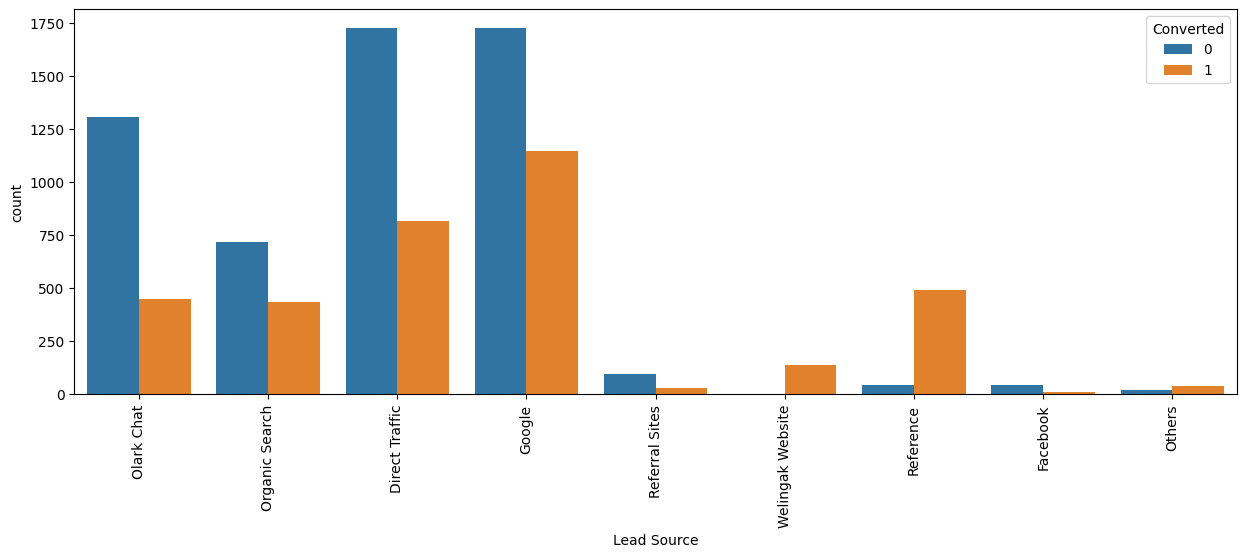

In [2140]:
# Plotting Lead Source Column
plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['Lead Source'].astype('str'), hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.xticks(rotation=90)
plt.show()

In [2141]:
# We find the top Lead Origin Sources and Google and Reference to be high yielding for conversions

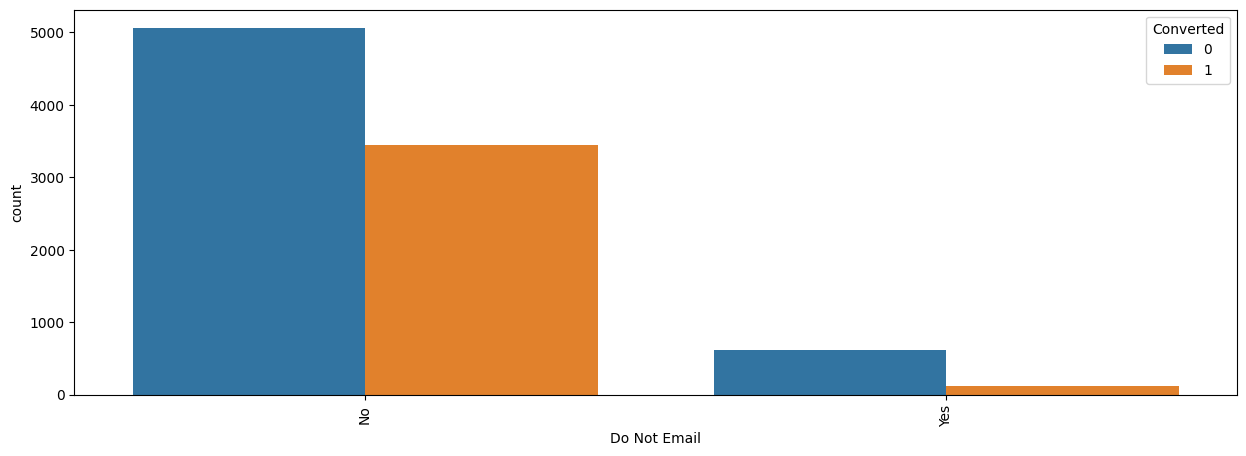

In [2142]:
# Plotting Do Not Email Column
plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['Do Not Email'].astype('str'), hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.xticks(rotation=90)
plt.show()

In [2143]:
# Conversion more among people who want emails

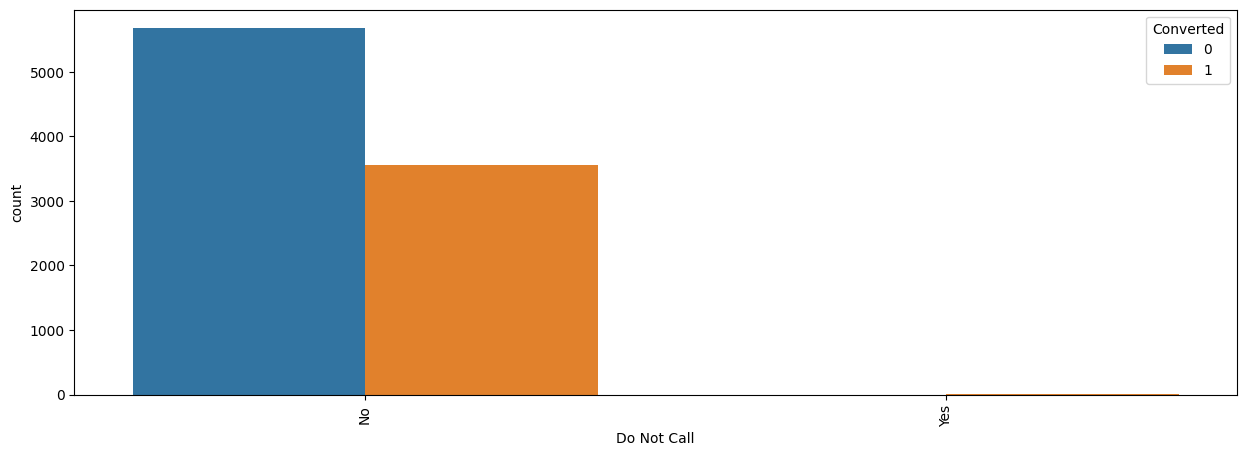

In [2144]:
# Plotting Do Not Call Column
plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['Do Not Call'].astype('str'), hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.xticks(rotation=90)
plt.show()

In [2145]:
# Most people want calls

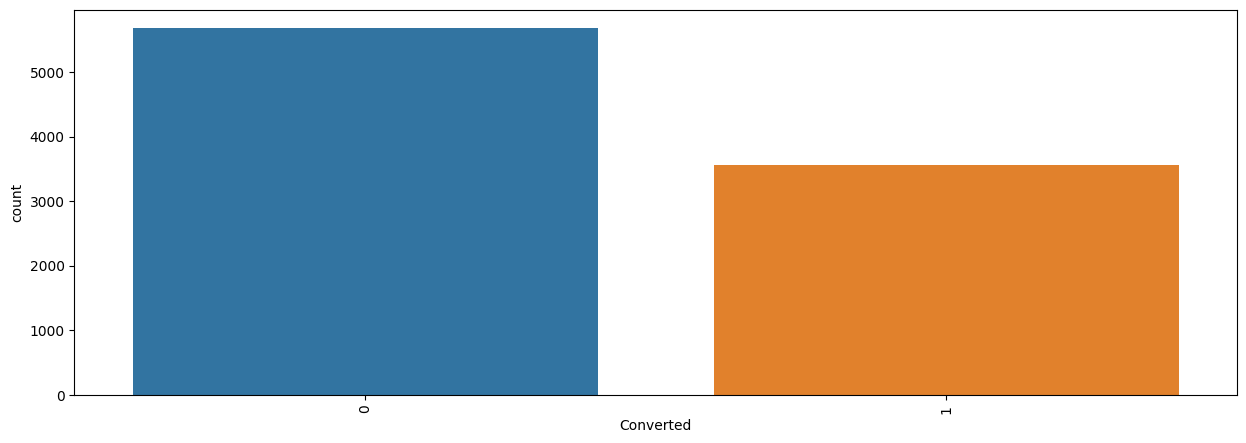

In [2146]:
# Plotting Converted Column
plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['Converted'].astype('str'))
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.xticks(rotation=90)
plt.show()

In [2147]:
# We can get a sense of the conversion ratio from this

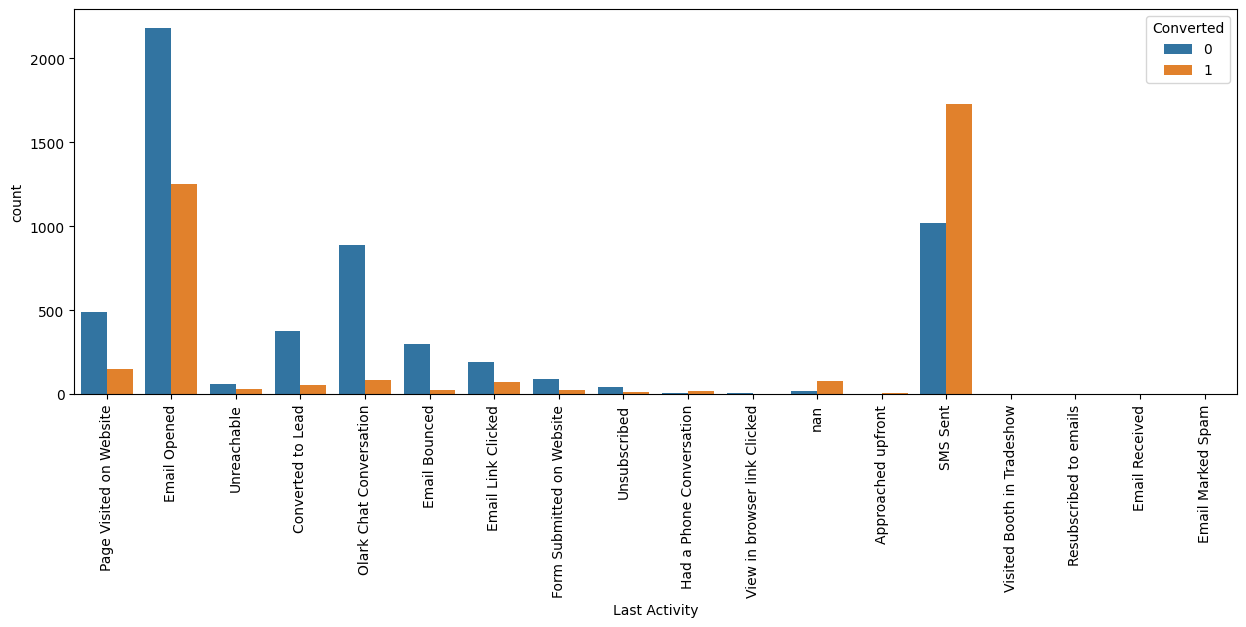

In [2148]:
# Plotting Last Activity Column
plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['Last Activity'].astype('str'), hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.xticks(rotation=90)
plt.show()

In [2149]:
# Sms Sent, Email Opened are conscious choices so these peropns are more worth pursuing for leads.

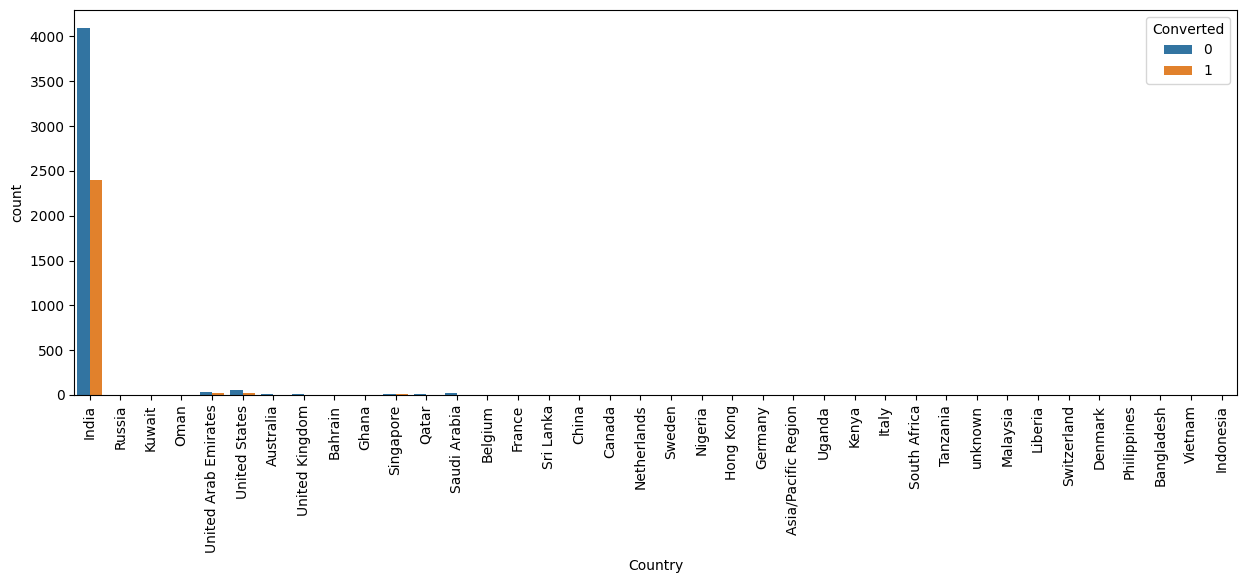

In [2150]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [2151]:
leads['Country'].value_counts()/len(leads)*100

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

In [2152]:
#checking value counts of Country column

leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [2153]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

leads['Country'] = leads['Country'].replace(np.nan,'India')

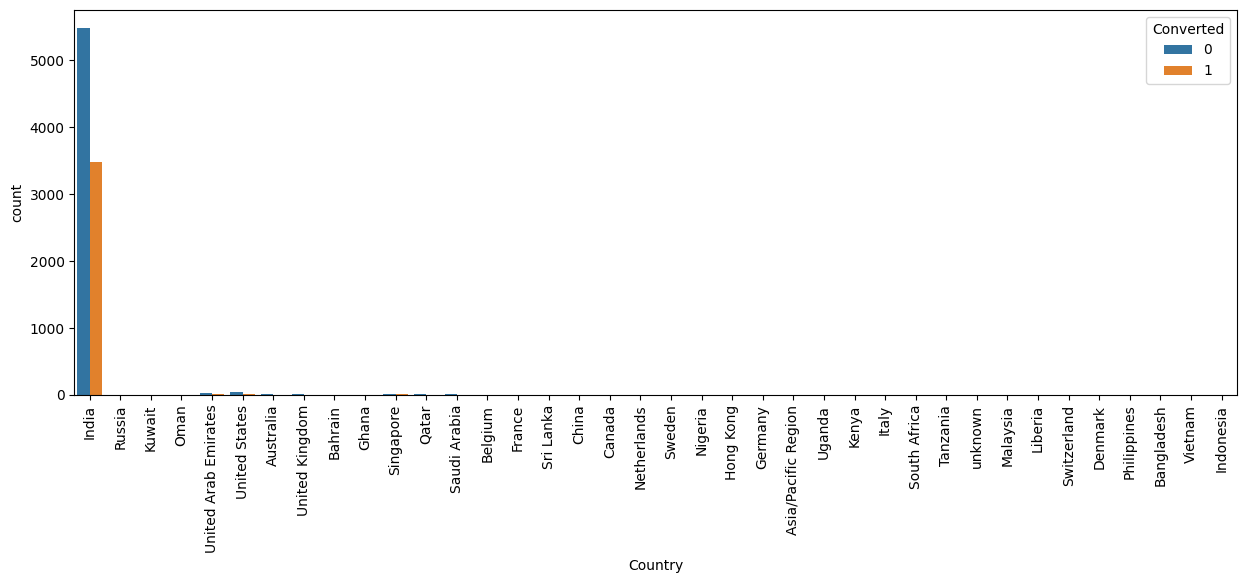

In [2154]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [2155]:
leads['Country'].value_counts()/len(leads)*100

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

In [2156]:
# 97 Percent of Data is India.So not much variance in the data .We can drop this variable alltogether

In [2157]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [2158]:
#checking value counts of "City" column

leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

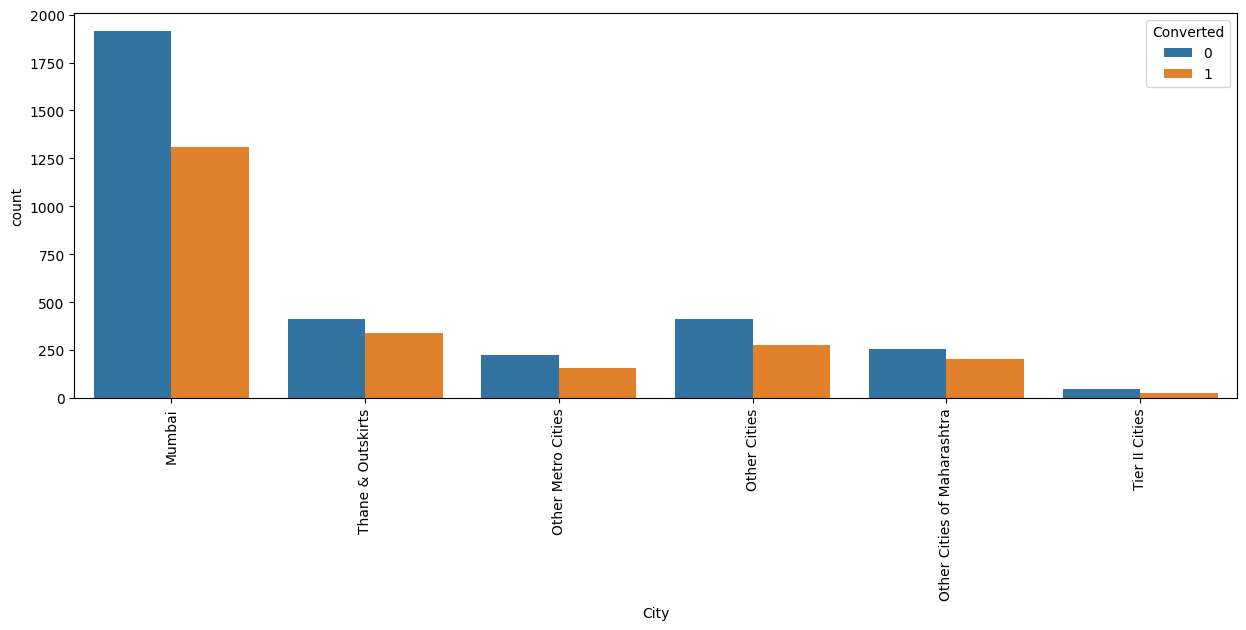

In [2159]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads.City, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [2160]:
# Replacing with Mumbai since the top2 regions is Mumbai or nearby thane

In [2161]:
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

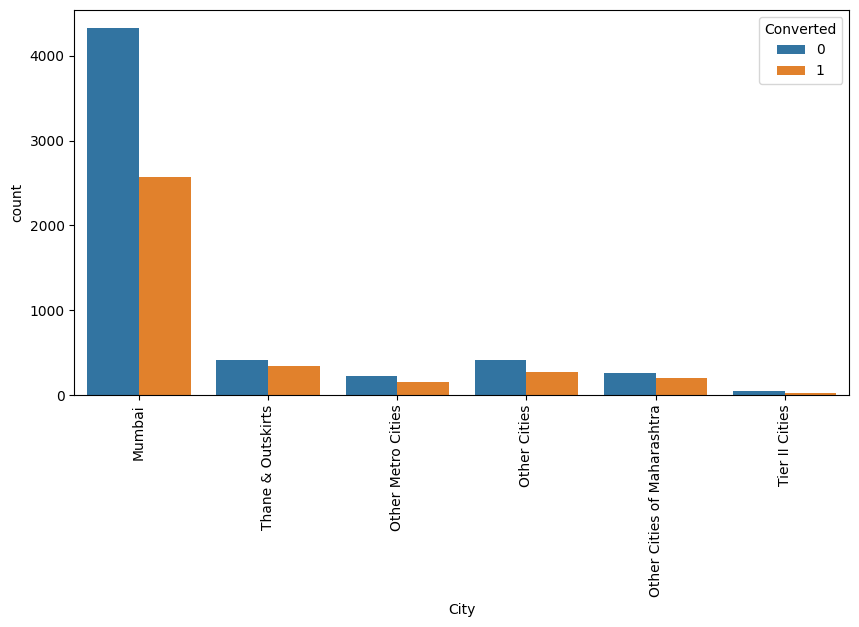

In [2162]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(x=leads.City, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [2163]:
# Huge No. of applicants from Mumbai Area

In [2164]:
#checking value counts of Specialization column

leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [2165]:
# Lead possibly didint find their category and thus didnt fill.So we replace with'Not Specified'

leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

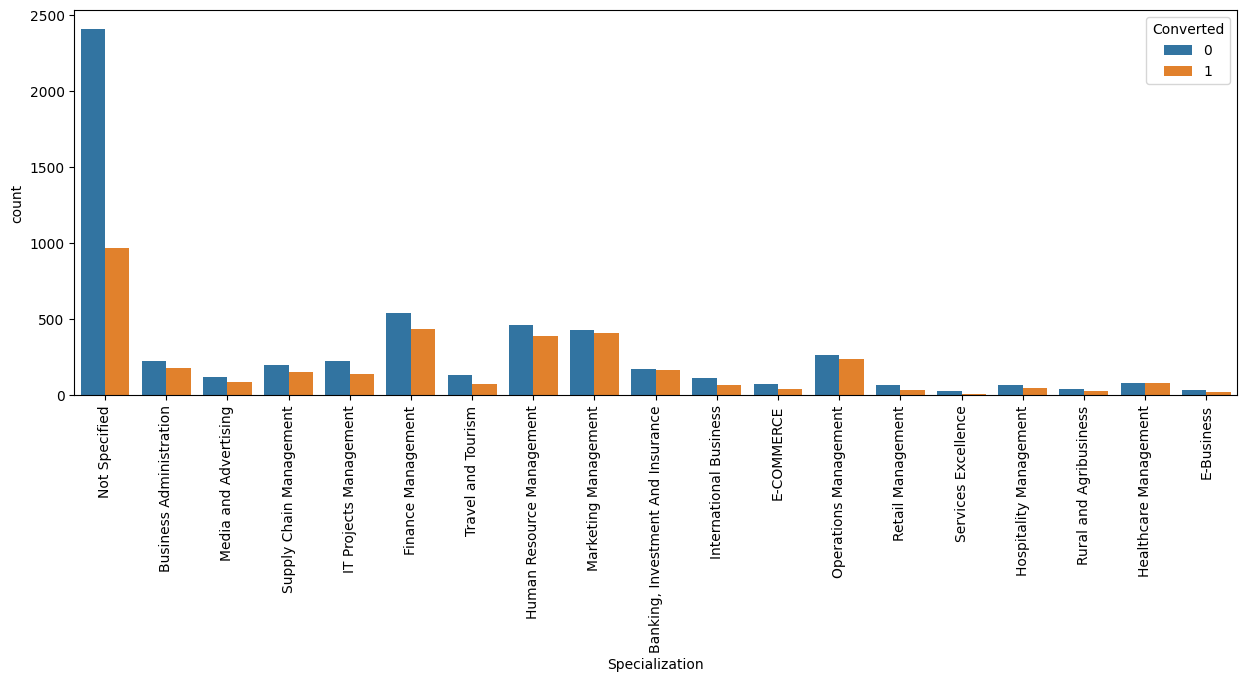

In [2166]:
#plotting Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [2167]:
# We see HR,Finance,Marketing have good conversion rates.

In [2168]:
# Also we find too many marketing specializations.We are clubbing them for easier analysis since they also showing similar trends.

In [2169]:
leads['Specialization'] = leads['Specialization'].replace(['Supply Chain Management','IT Projects Management','Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management','Retail Management','Hospitality Management','Healthcare Management'] ,'Management_Specializations')                           

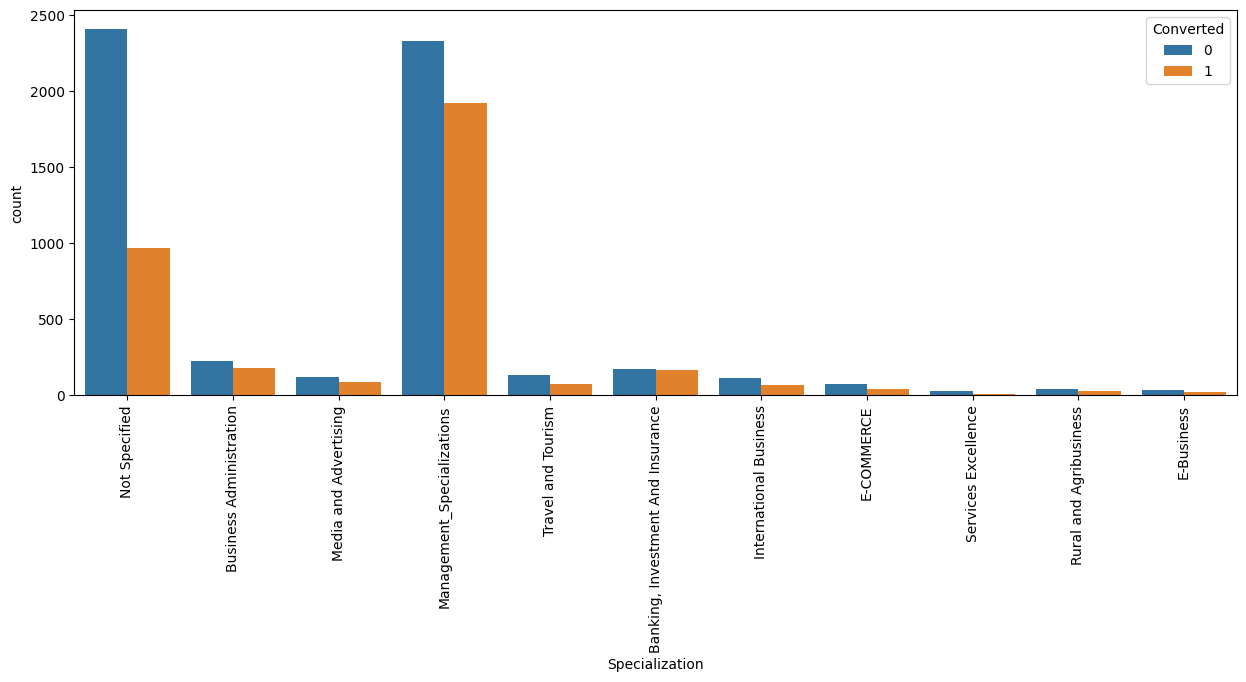

In [2170]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [2171]:
#What is your current occupation

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [2172]:
#Imputing Nan values with mode "Unemployed" since that is the most logical step that Unemployed people have not filled the Occupation Column

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [2173]:
#Checking count of values
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

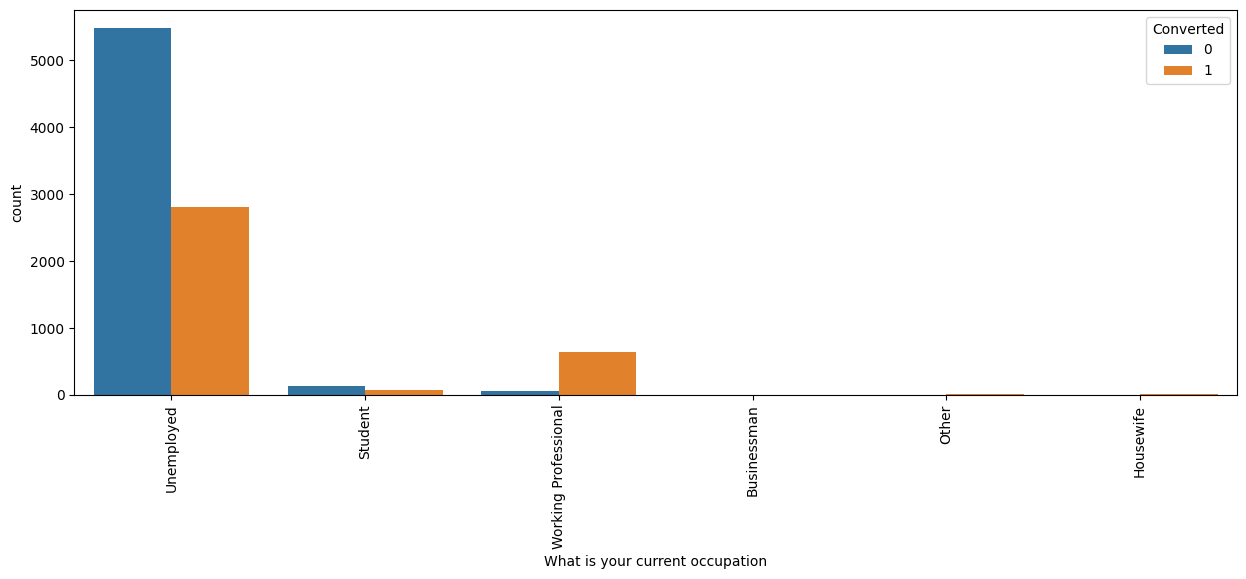

In [2174]:
#Visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Working Professionals Conversion rates are Higher
- Unemployed and Students Conversion Rate is lower possibly due to budgetary constraints

In [2175]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [2176]:
#Replacing Nan values with Mode "Better Career Prospects".This is in alignment with why most people career aspirations and upskilling.

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [2177]:
#checking value counts of variable
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

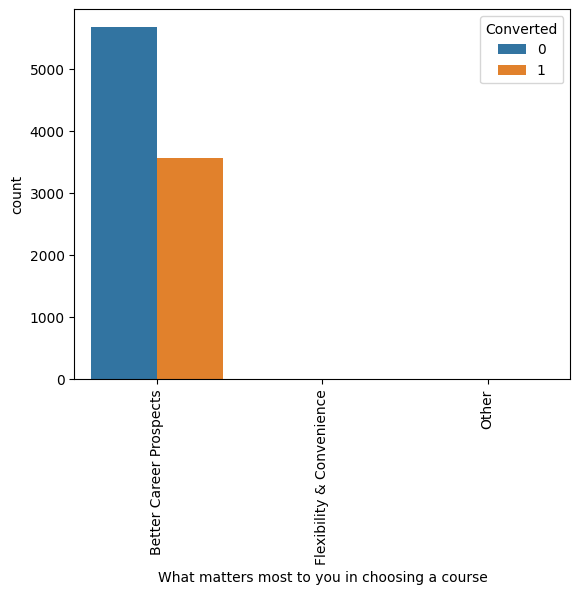

In [2178]:
#Visualizing the variable with Converted value

s1=sns.countplot(x=leads['What matters most to you in choosing a course'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [2179]:
#We observe very less variance in the data of this column.So we decide to drop this variable.We add this to our drop column list.
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

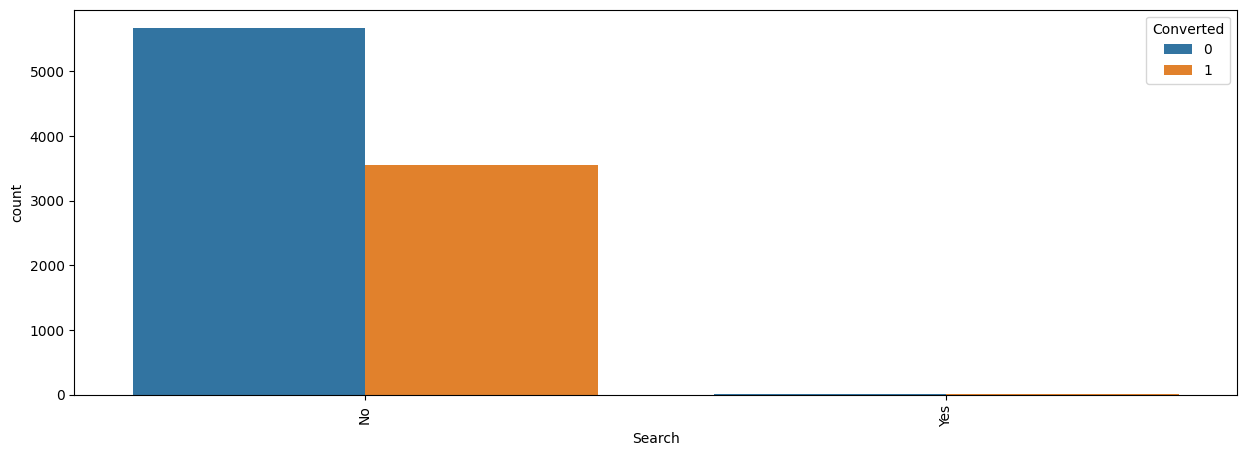

In [2180]:
#visualizing Search based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['Search'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

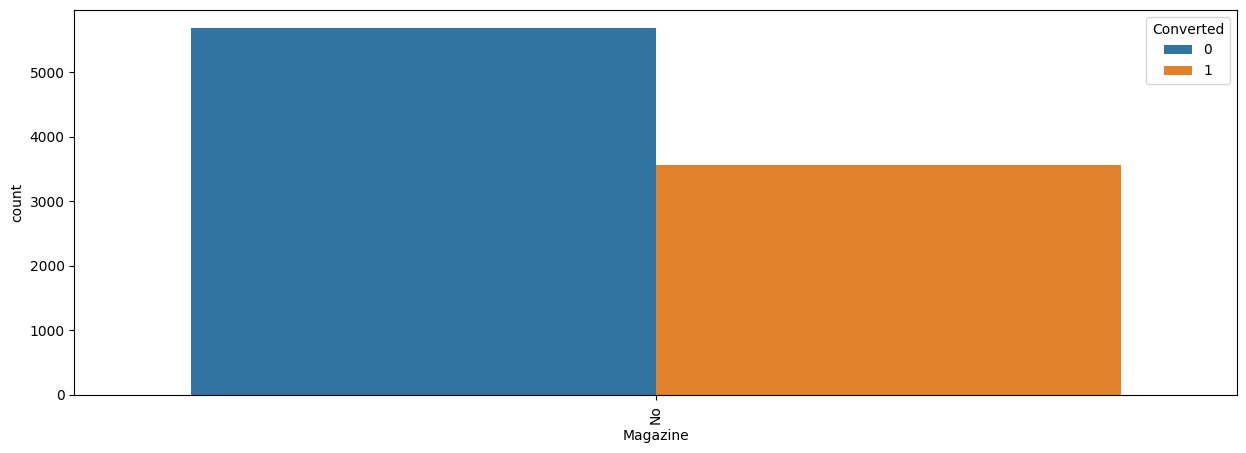

In [2181]:
#visualizing Magazine based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['Magazine'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

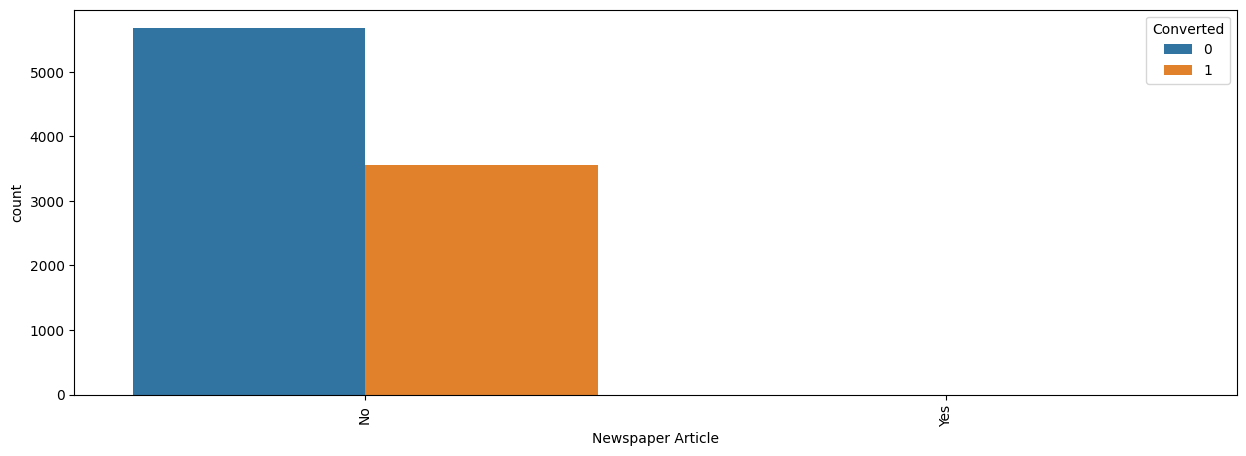

In [2182]:
#visualizing Tags based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['Newspaper Article'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

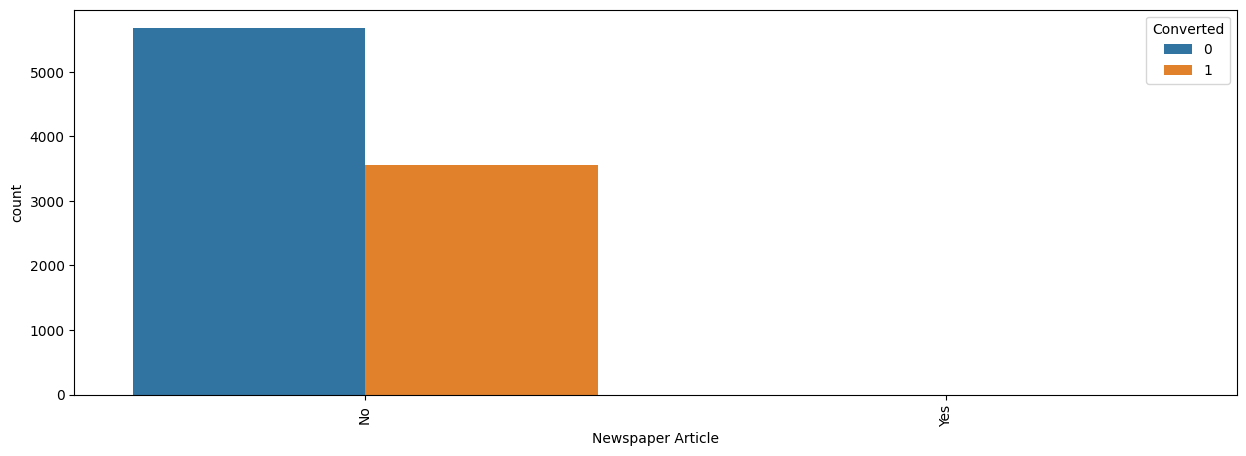

In [2183]:
#visualizing Newspaper Article based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['Newspaper Article'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

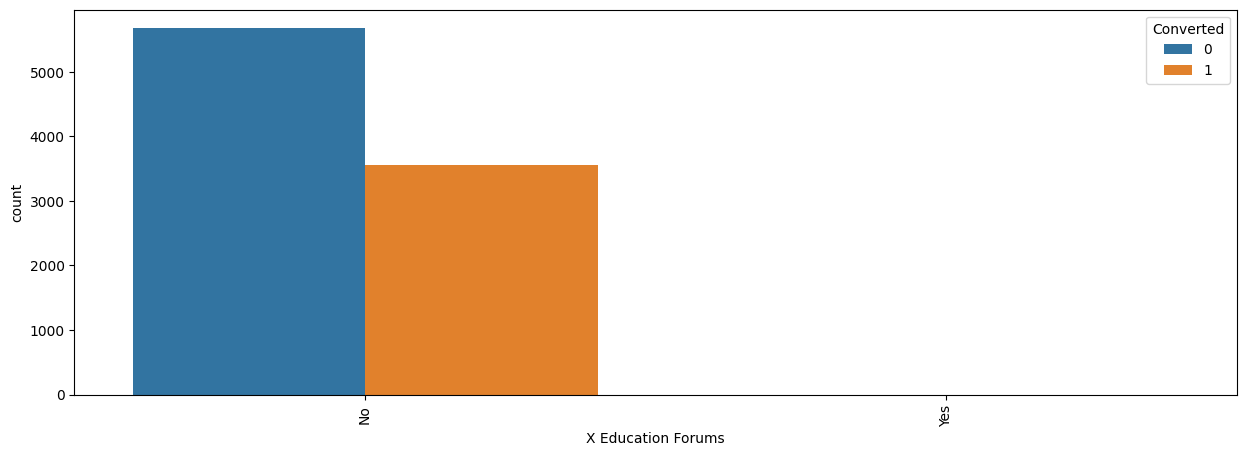

In [2184]:
#visualizing X Education Forums based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['X Education Forums'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

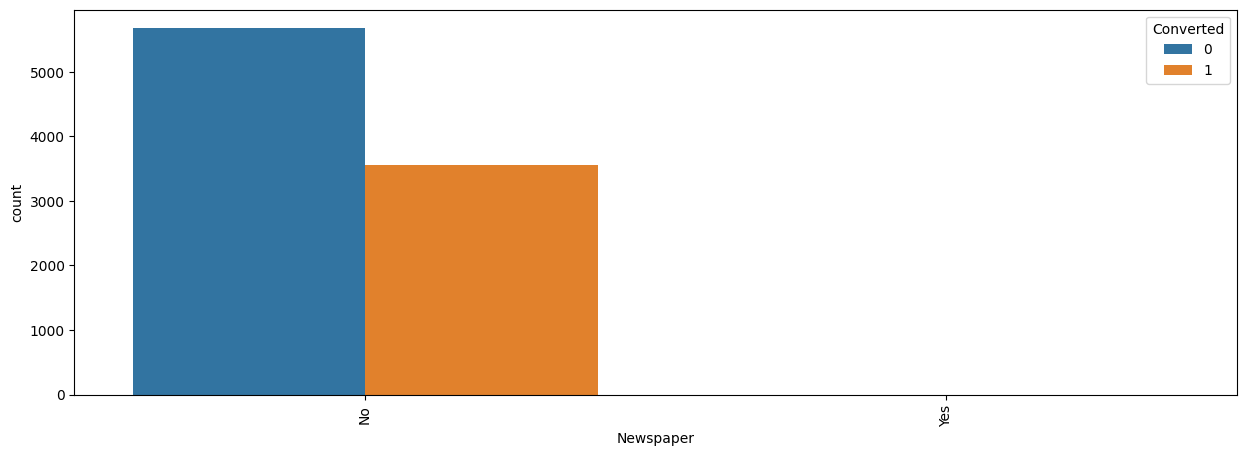

In [2185]:
#visualizing Newspaper based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['Newspaper'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

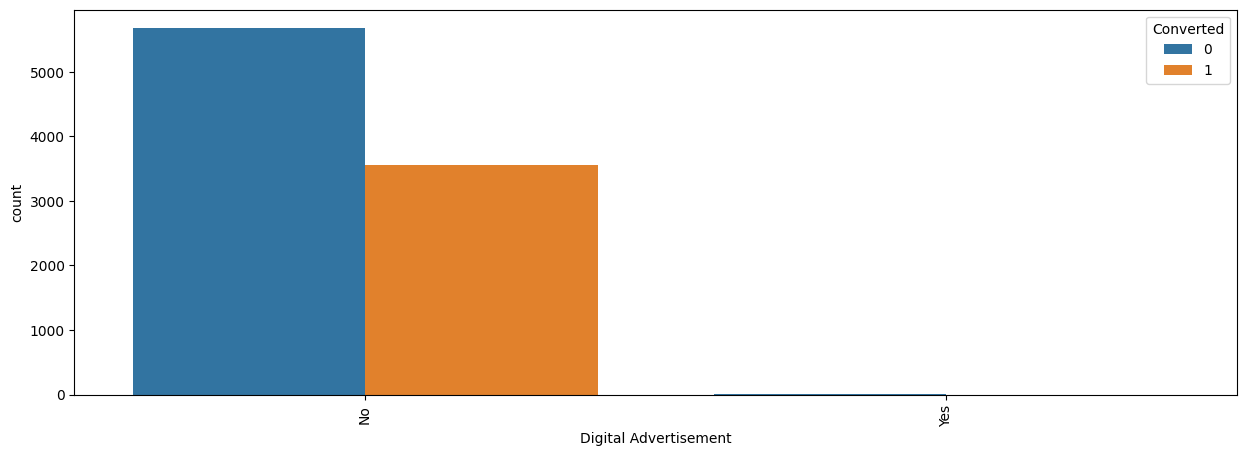

In [2186]:
#visualizing Digital Advertisement based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['Digital Advertisement'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

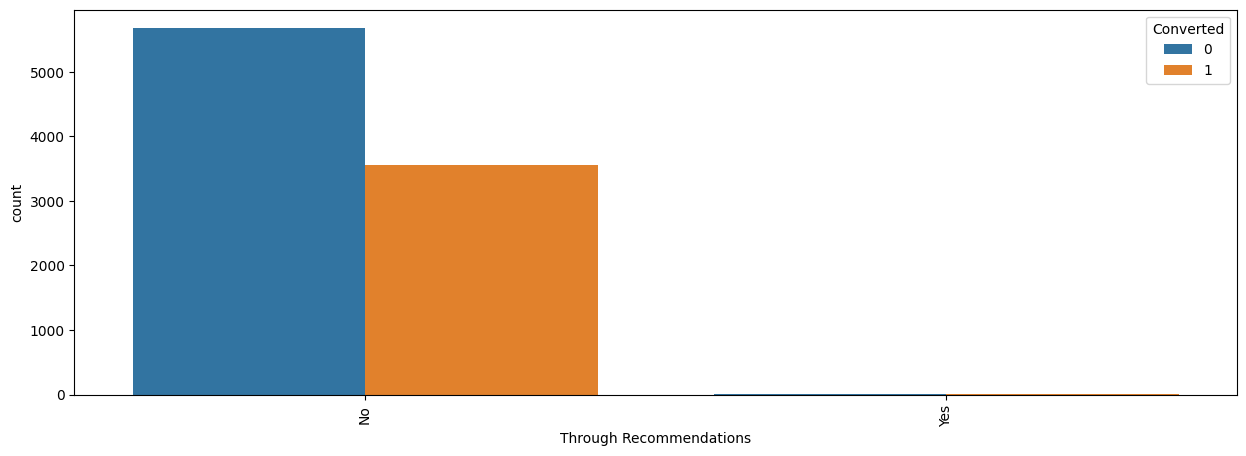

In [2187]:
#visualizing Through Recommendations based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['Through Recommendations'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

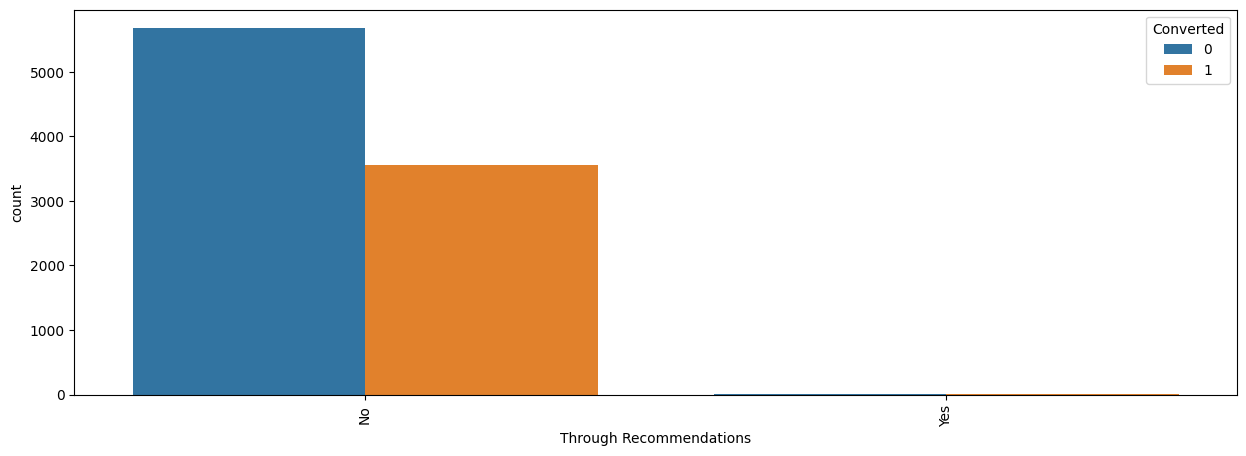

In [2188]:
#visualizing Through Recommendations based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['Through Recommendations'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

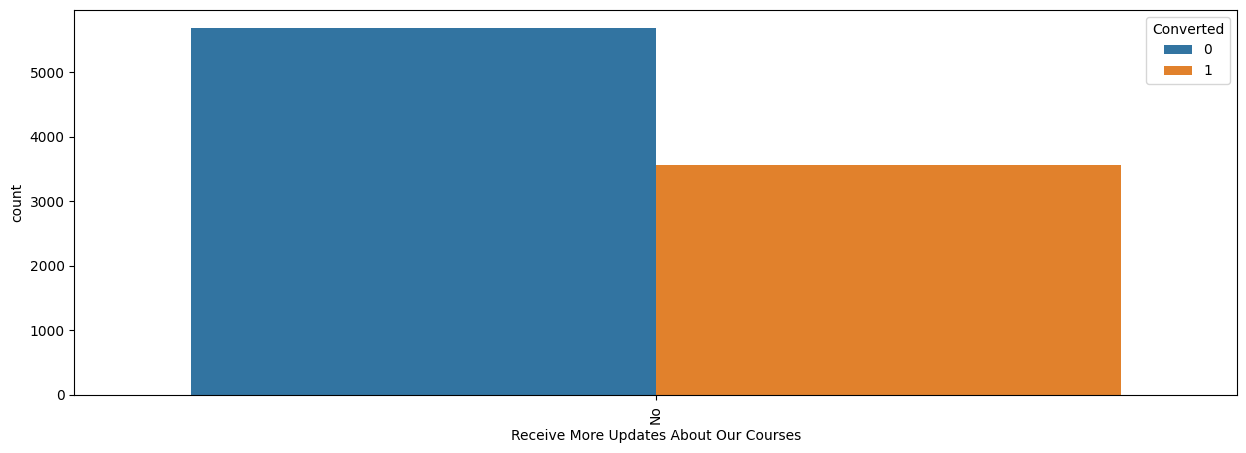

In [2189]:
#visualizing Receive More Updates About Our Courses based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['Receive More Updates About Our Courses'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [2190]:
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [2191]:
#replacing Nan values with "Not Specified" since values are close by and not appropriate to substitute by median itself.
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

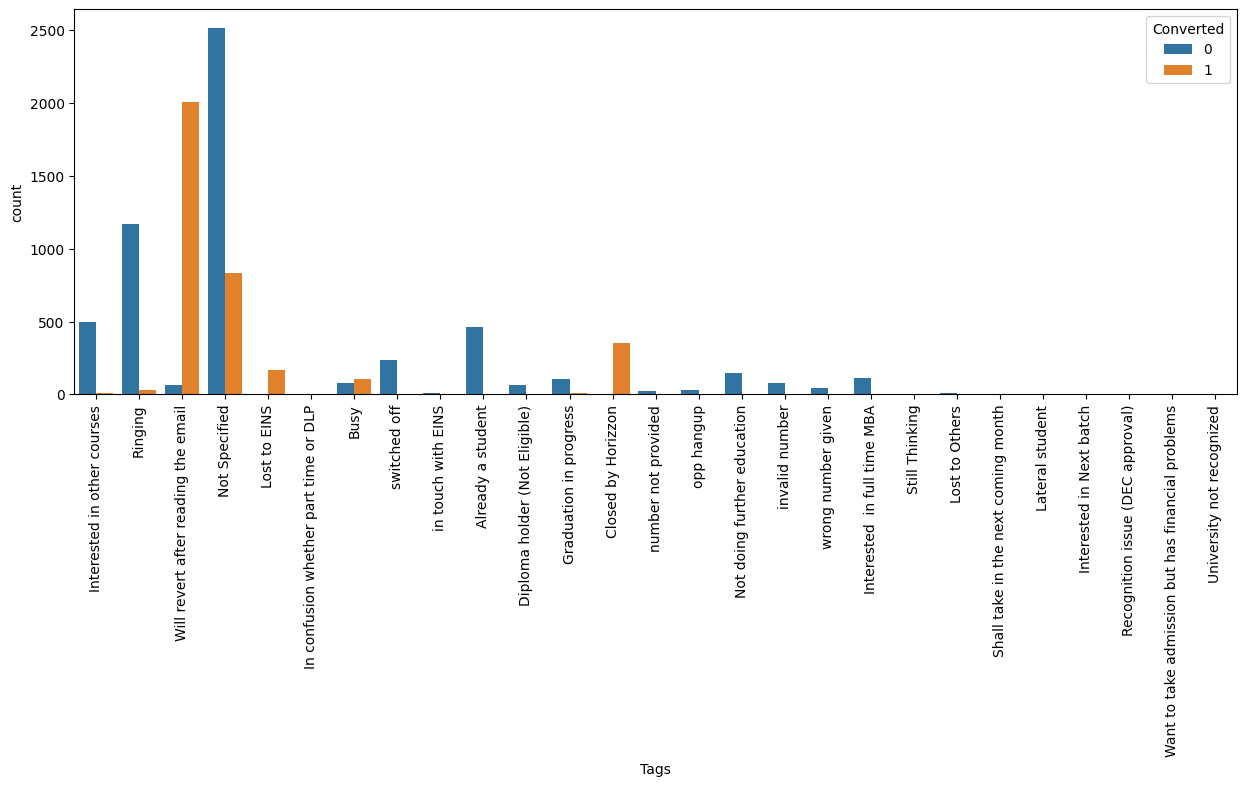

In [2192]:
#Visualizing Tags based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [2193]:
#Clubbing tags with less than 30 occurences to "Other Tags"
leads['Tags'] = leads['Tags'].replace(['number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'], 'Other_Tags')

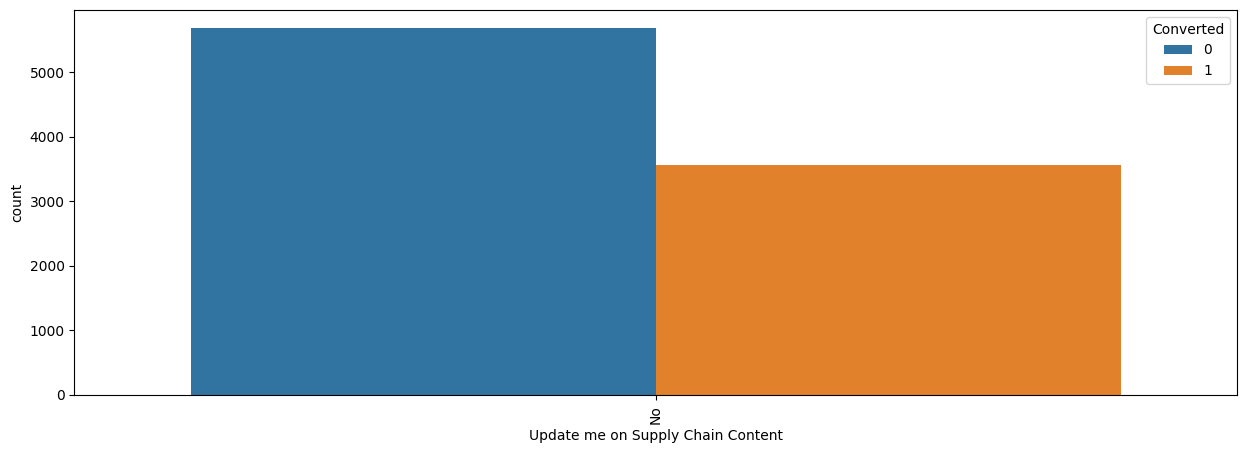

In [2194]:
#Visualizing Update me on Supply Chain Content based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['Update me on Supply Chain Content'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

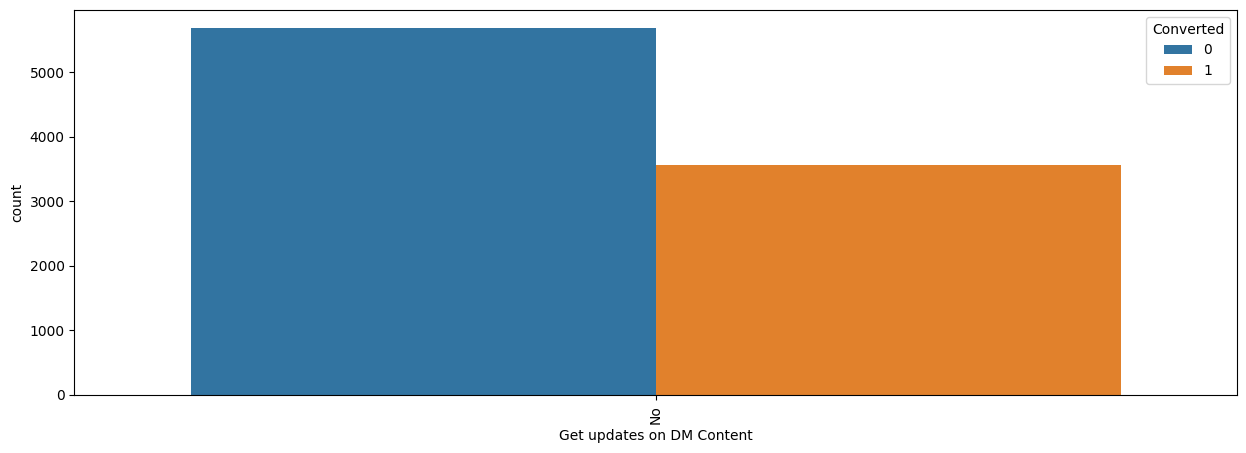

In [2195]:
#Visualizing Update me on Supply Chain Content based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['Get updates on DM Content'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

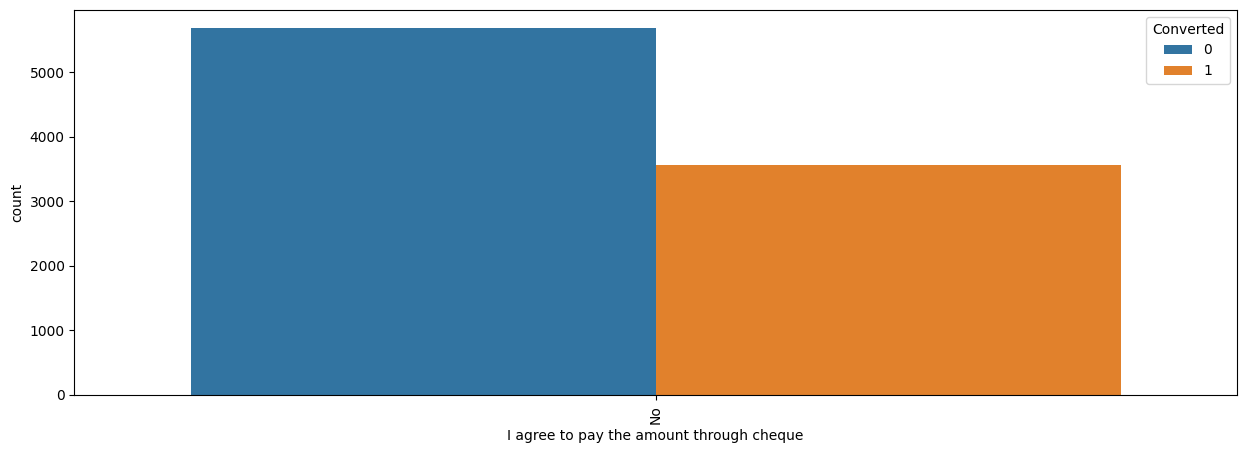

In [2196]:
#Visualizing I agree to pay the amount through cheque based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['I agree to pay the amount through cheque'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

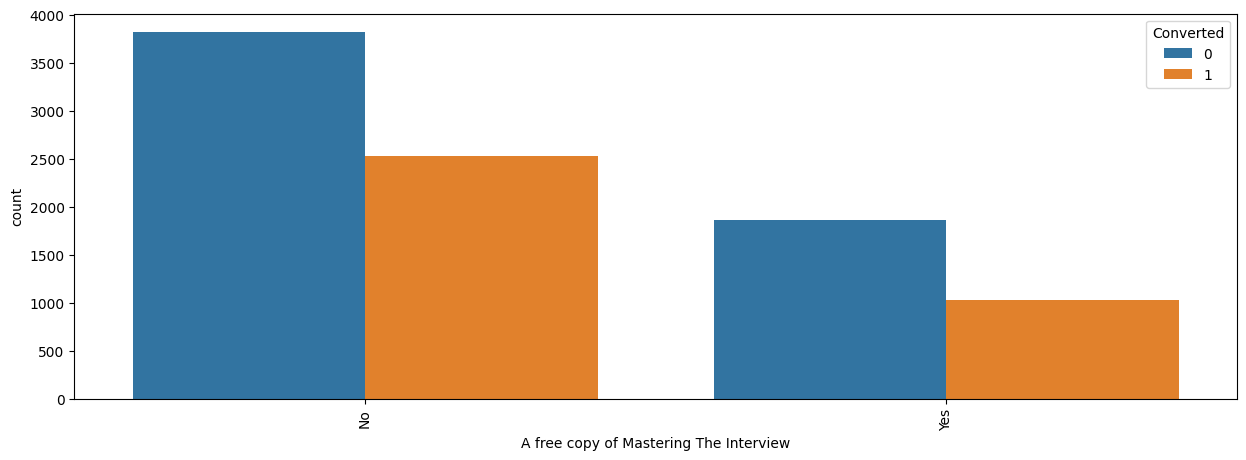

In [2197]:
#Visualizing A free copy of Mastering The Interview based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['A free copy of Mastering The Interview'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

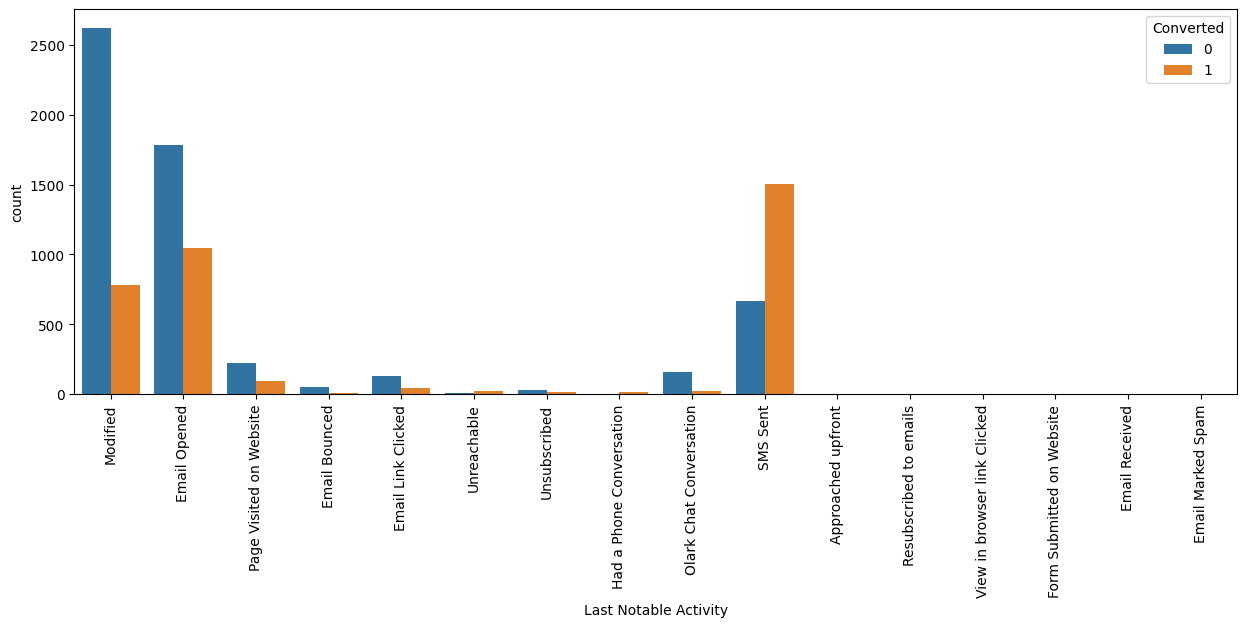

In [2198]:
#Visualizing A free copy of Mastering The Interview based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['Last Notable Activity'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [2199]:
#Clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced', 
                                                                        'Unreachable',
                                                                        'Unsubscribed',
                                                                        'Had a Phone Conversation',
                                                                        'Approached upfront','Resubscribed to emails','View in browser link Clicked', 
                                                                        'Form Submitted on Website', 
                                                                        'Email Received','Email Marked Spam'],'Other_Notable_activity')

In [2200]:
#checking percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [2201]:
#checking value counts of Lead Source column

leads['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                59
Facebook              55
Name: Lead Source, dtype: int64

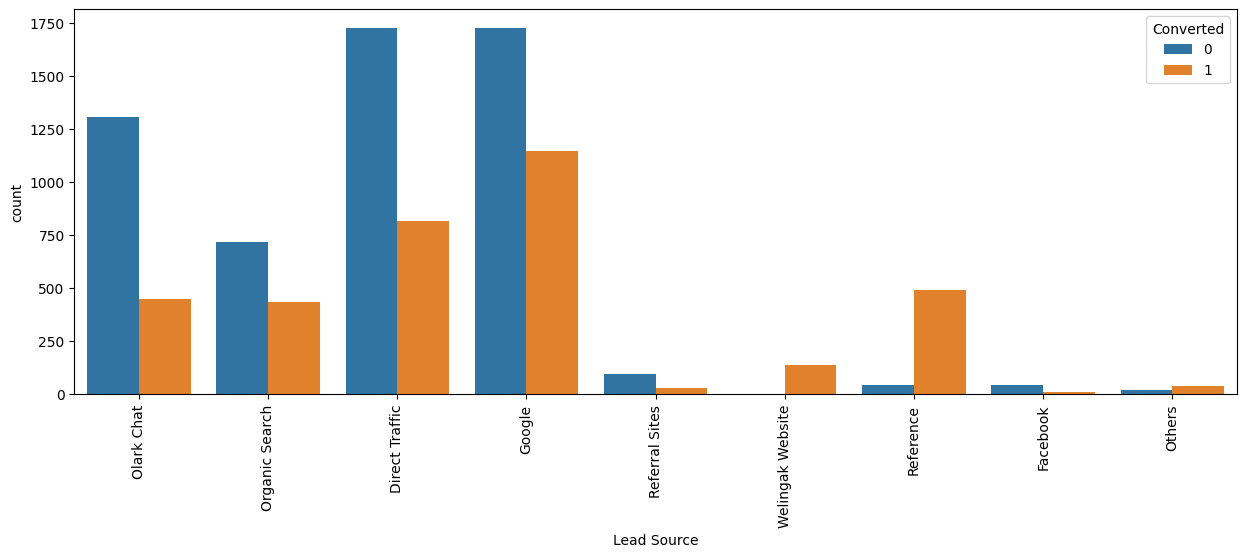

In [2202]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x=leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Insights

1. Google and Direct Traffic has the biggest share.
2. Conversion rate wise Welingak Website and Reference has the highest conversion rates.
3. We should focus on improving the conversion rates of Google, Direct Traffic, Organic Search and Olark Chat as they have quite a lot of potential leads which should be harnessed

In [2203]:
# Last Activity

leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [2204]:
#Replacing Nan Values and clubbing low occurence values

leads['Last Activity'] = leads['Last Activity'].replace([np.NaN,'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Other Activities')

In [2205]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Other Activities              124
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Name: Last Activity, dtype: int64

In [2206]:
# Null Value Handling

In [2207]:
#Check the Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [2208]:
#We see very few amount of missing data in the columns.This much we can safely drop without impacting final models
leads = leads.dropna()

In [2209]:
#Rechecking:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [2210]:
for i in leads.select_dtypes('object').columns:
    print(leads[i].value_counts()[:])

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64
Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                52
Facebook              31
Name: Lead Source, dtype: int64
No     8379
Yes     724
Name: Do Not Email, dtype: int64
No     9101
Yes       2
Name: Do Not Call, dtype: int64
Email Opened                 3437
SMS Sent                     2738
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   61
Had a Phone Conversation       25
Other Activities               17
Name: Last Activity, dtype: int64
India                   8816

In [2211]:
leads['I agree to pay the amount through cheque'].value_counts()[:]

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [2212]:
# We see that some categorical variables are have only 1 category level in them.So they effectively have no prediction power in final model.Also for some variables there are 2 category levels
# but of the levels have only a few occurences  so even they are not useful much.We will drop such variables by adding them to our cols_to_drop list.

In [2213]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [2214]:
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [2215]:
#Dropping the Unncessary Columns
leads = leads.drop(cols_to_drop,axis=1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

## Numerical Variables Analysis:

In [2216]:
leads.select_dtypes('number')

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0.0,0,0.00
1,0,5.0,674,2.50
2,1,2.0,1532,2.00
3,0,1.0,305,1.00
4,1,2.0,1428,1.00
...,...,...,...,...
9235,1,8.0,1845,2.67
9236,0,2.0,238,2.00
9237,0,2.0,199,2.00
9238,1,3.0,499,3.00


In [2217]:
#Check the Conversion rate:
Converted = (sum(leads['Converted'])/len(leads['Converted']))*100
Converted

38.02043282434362

### Correlation Matrix

C:\Users\antar\AppData\Local\Temp\ipykernel_22940\1196000644.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)


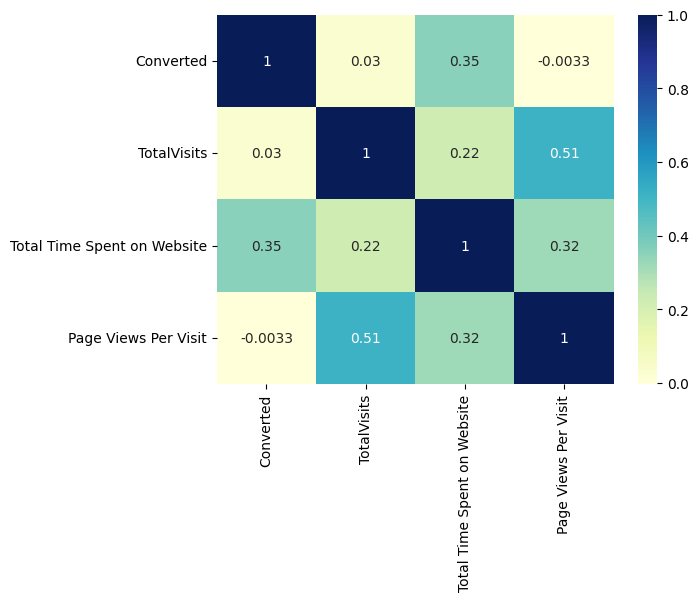

In [2218]:
# Heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [2219]:
leads.corr()

C:\Users\antar\AppData\Local\Temp\ipykernel_22940\2665278580.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  leads.corr()


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.030395,0.354939,-0.003328
TotalVisits,0.030395,1.000000,0.221240,0.512125
Total Time Spent on Website,0.354939,0.221240,1.000000,0.320361
Page Views Per Visit,-0.003328,0.512125,0.320361,1.000000


In [2220]:
# Not much significant correlations observed among the variables

In [2221]:
#Since Converted is a Binary variable lets start the numerical Analysis of Total Visits Column

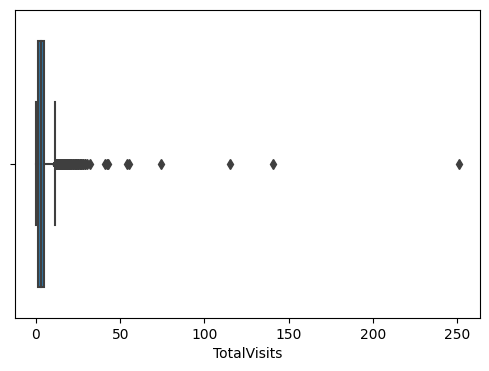

In [2222]:
#Total Visits
#Visualizing Distribution

plt.figure(figsize=(6,4))
sns.boxplot(x=leads['TotalVisits'])
plt.show()

We can see presence of outliers here

In [2223]:
#"Total Visits" Percentiles

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

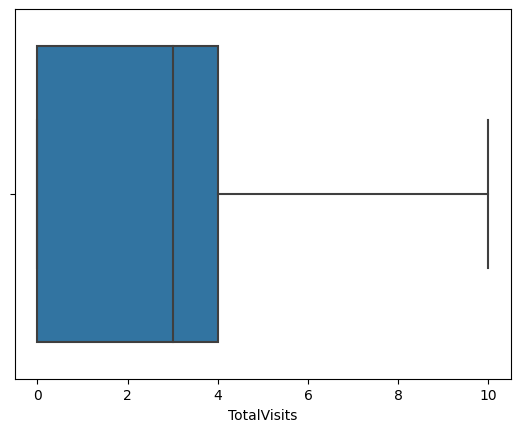

In [2224]:
#Outlier Treatment of Total Visits: Removing top 5% & bottom 1% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.95)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(x=leads['TotalVisits'])
plt.show()

In [2225]:
leads.shape

(8750, 14)

In [2226]:
#"Total Time Spent on Website" Percentiles

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8750.000000
mean      471.579771
std       542.047642
min         0.000000
5%          0.000000
25%         0.000000
50%       234.000000
75%       895.750000
90%      1364.200000
95%      1549.000000
99%      1826.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

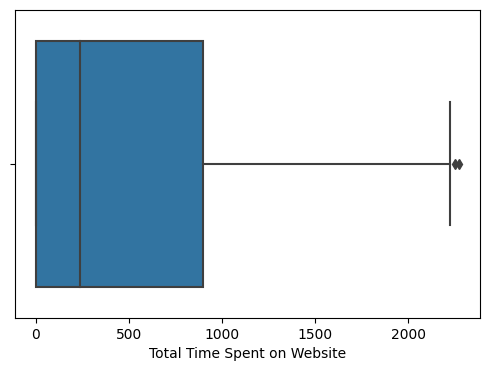

In [2227]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(x=leads['Total Time Spent on Website'])
plt.show()

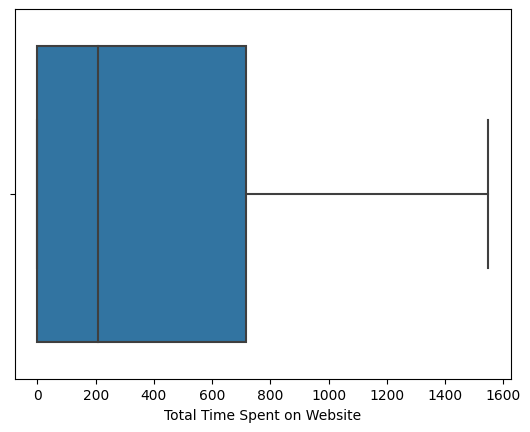

In [2228]:
#Outlier Treatment of Total Visits: Removing top 5% of the Column Outlier values

Q3 = leads['Total Time Spent on Website'].quantile(0.95)
leads = leads[(leads['Total Time Spent on Website'] <= Q3)]
# Q1 = leads['Total Time Spent on Website'].quantile(0.05)
# leads = leads[(leads['Total Time Spent on Website'] >= Q1)]
sns.boxplot(x=leads['Total Time Spent on Website'])
plt.show()

Check for Page Views Per Visit:

In [2229]:
#"Page Views Per Visit" percentiles

leads['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8313.000000
mean        2.204568
std         1.929561
min         0.000000
5%          0.000000
25%         0.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         8.000000
max        10.000000
Name: Page Views Per Visit, dtype: float64

In [2230]:
leads['Page Views Per Visit']

0       0.0
1       2.5
2       2.0
3       1.0
4       1.0
       ... 
9234    2.5
9236    2.0
9237    2.0
9238    3.0
9239    3.0
Name: Page Views Per Visit, Length: 8313, dtype: float64

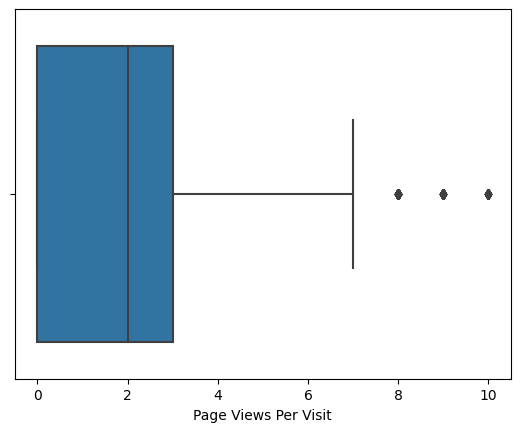

In [2231]:
#Page Views Per Visit Distribution checking

# plt.figure(figsize=(6,4))
sns.boxplot(x=leads['Page Views Per Visit'])
plt.show()

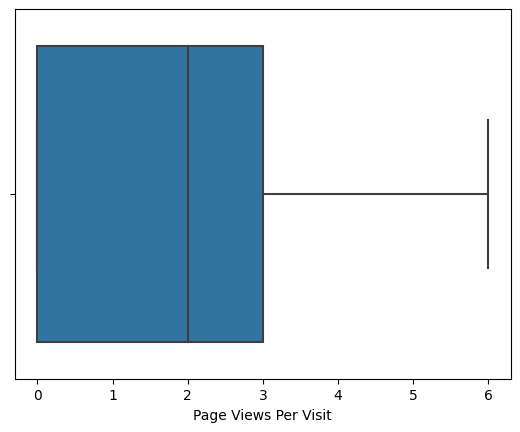

In [2232]:
#Outlier Treatment: Remove top 5% & bottom 1% 

Q3 = leads['Page Views Per Visit'].quantile(0.95)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(x=leads['Page Views Per Visit'])
plt.show()

In [2233]:
leads.shape

(8053, 14)

In [2234]:
leads

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,Landing Page Submission,Direct Traffic,No,1,5.0,210,2.5,SMS Sent,Business Administration,Unemployed,Will revert after reading the email,Mumbai,No,Modified
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.0,SMS Sent,Media and Advertising,Unemployed,wrong number given,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.0,SMS Sent,Business Administration,Unemployed,invalid number,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,No,1,3.0,499,3.0,SMS Sent,Management_Specializations,Unemployed,Not Specified,Other Metro Cities,No,SMS Sent


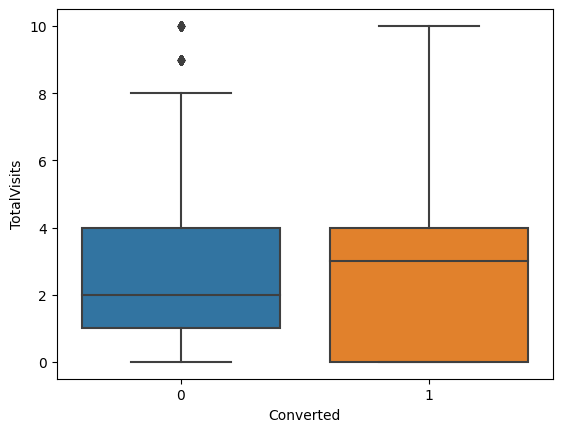

In [2235]:
# "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

Insights:
    - The graphs looks similar in bosth cases.so inconclusive

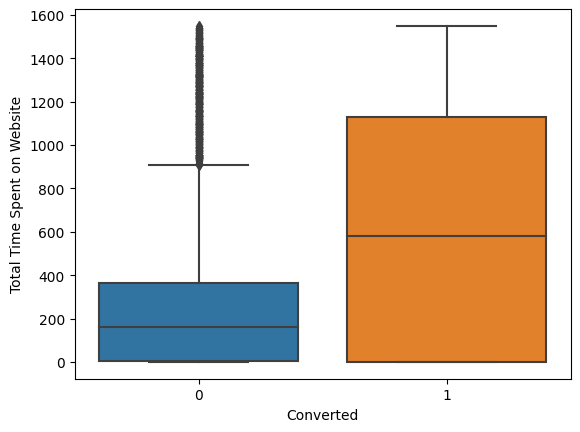

In [2236]:
#"Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

Insights:
- Very good difference observed in the graph. People who convert spend much more time on average on the websites
- Some people stay on website but till dont convert may be some design improvement and engaging content will help more conversion from them.

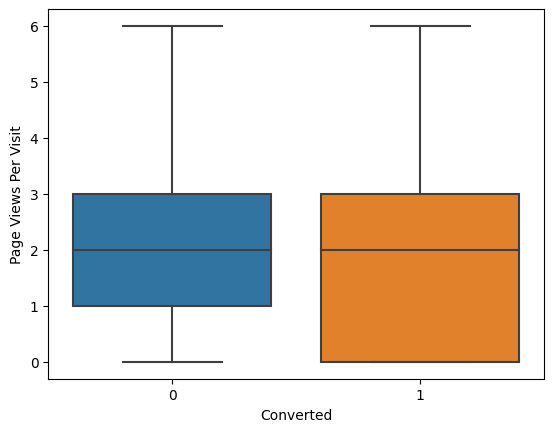

In [2237]:
#"Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

Insights
- Not much difference factor observed here.Possibly not that important to for ensuring conversion.

In [2238]:
# Our EDA portion ends here. Here on get data ready for modelling we are creating dummy variable since logistic regression by default cannot handle categorical data.

## Dummy Variable Creation for the categorical columns:

In [2239]:
# categorical columns
cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [2240]:
for i in cat_cols:
    print(leads[i].value_counts())

Landing Page Submission    4110
API                        3318
Lead Add Form               595
Lead Import                  30
Name: Lead Origin, dtype: int64
Google              2525
Direct Traffic      2190
Olark Chat          1732
Organic Search       869
Reference            433
Welingak Website     128
Referral Sites        96
Others                50
Facebook              30
Name: Lead Source, dtype: int64
No     7419
Yes     634
Name: Do Not Email, dtype: int64
Email Opened                 3032
SMS Sent                     2396
Olark Chat Conversation       924
Page Visited on Website       486
Converted to Lead             408
Email Bounced                 295
Email Link Clicked            243
Form Submitted on Website     103
Unreachable                    80
Unsubscribed                   55
Had a Phone Conversation       17
Other Activities               14
Name: Last Activity, dtype: int64
Management_Specializations           3611
Not Specified                        3132


In [2241]:
# On inspection we find that there are 2 categorical variables namely 'A free copy of Mastering The Interview' and 'Do Not Email' 

In [2242]:
map_lst =  ['Do Not Email','A free copy of Mastering The Interview']
# Defining the map function
def map_fnc(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the map_lst
leads[map_lst] = leads[map_lst].apply(map_fnc)

In [2243]:
leads.select_dtypes('object').columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [2244]:
# The other variables left are actual categorical variables and we need to create dummies for them. We will drop the instance with the lowest occurence or according to 
# data imputation and business understanding

In [2245]:
dummy = pd.get_dummies(leads['Lead Origin'], prefix  = 'Lead Origin')
dummy = dummy.drop(['Lead Origin_Lead Import'], 1)
leads = pd.concat([leads, dummy], axis = 1)

C:\Users\antar\AppData\Local\Temp\ipykernel_22940\2580243248.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dummy = dummy.drop(['Lead Origin_Lead Import'], 1)


In [2246]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

C:\Users\antar\AppData\Local\Temp\ipykernel_22940\3560219905.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dummy = dummy.drop(['Lead Source_Others'], 1)


In [2247]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Other Activities'], 1)
leads = pd.concat([leads, dummy], axis = 1)

C:\Users\antar\AppData\Local\Temp\ipykernel_22940\1106091981.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dummy = dummy.drop(['Last Activity_Other Activities'], 1)


In [2248]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

C:\Users\antar\AppData\Local\Temp\ipykernel_22940\4101457062.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dummy = dummy.drop(['Specialization_Not Specified'], 1)


In [2249]:
dummy = pd.get_dummies(leads['What is your current occupation'], prefix  = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_Other'], 1)
leads = pd.concat([leads, dummy], axis = 1)

C:\Users\antar\AppData\Local\Temp\ipykernel_22940\2388543839.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dummy = dummy.drop(['What is your current occupation_Other'], 1)


In [2250]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

C:\Users\antar\AppData\Local\Temp\ipykernel_22940\2774545605.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dummy = dummy.drop(['Tags_Not Specified'], 1)


In [2251]:
dummy = pd.get_dummies(leads['City'], prefix  = 'City')
dummy = dummy.drop(['City_Other Cities'], 1)
leads = pd.concat([leads, dummy], axis = 1)

C:\Users\antar\AppData\Local\Temp\ipykernel_22940\2447633998.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dummy = dummy.drop(['City_Other Cities'], 1)


In [2252]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads = pd.concat([leads, dummy], axis = 1)

C:\Users\antar\AppData\Local\Temp\ipykernel_22940\2318210333.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)


In [2253]:
# Removing the 2 columns from categorical list which we mapped to numerical values

In [2254]:
cat_cols=cat_cols.drop(['Do Not Email','A free copy of Mastering The Interview'])
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [2255]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

C:\Users\antar\AppData\Local\Temp\ipykernel_22940\296340200.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  leads.drop(cat_cols,1,inplace = True)


In [2256]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,...,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,1,2.0,1428,1.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


# Logistic Regression Model Building:

## Train-Test Splitting Data

In [2257]:
from sklearn.model_selection import train_test_split

y = leads['Converted']

X=leads.drop('Converted', axis=1)

In [2258]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [2259]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,...,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,2.0,1428,1.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [2260]:
# Splitting the data into train and test at 75 25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=100)

In [2261]:
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Bu

In [2262]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6039 entries, 7558 to 6489
Data columns (total 69 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6039 non-null   int64  
 1   TotalVisits                                           6039 non-null   float64
 2   Total Time Spent on Website                           6039 non-null   int64  
 3   Page Views Per Visit                                  6039 non-null   float64
 4   A free copy of Mastering The Interview                6039 non-null   int64  
 5   Lead Origin_API                                       6039 non-null   uint8  
 6   Lead Origin_Landing Page Submission                   6039 non-null   uint8  
 7   Lead Origin_Lead Add Form                             6039 non-null   uint8  
 8   Lead Source_Direct Traffic                            6

## Data Scaling:

In [2263]:
# #scaling numeric columns

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# numeric_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

# X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# X_train.head()

In [2264]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols=X_train.columns

X_train[cols] = scaler.fit_transform(X_train)

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,...,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7558,3.426442,-0.720437,0.226101,-0.614085,-0.648542,-0.830484,0.976918,-0.28883,1.639837,-0.05618,-0.671295,-0.524782,-0.348495,-0.243872,-0.110616,-0.127096,-0.229436,5.071611,-0.175778,-0.774699,-0.115131,-0.0499,-0.358866,-0.250659,-0.653957,...,-0.178265,-0.082678,-0.119483,-0.122998,-0.243109,-0.134942,-0.127767,-0.090445,-0.384553,-0.513214,-0.098475,-0.061832,-0.1655,-0.071832,-1.752755,4.501565,-0.208676,-0.28782,-0.079576,-0.13871,-0.663001,1.288092,-0.147155,-0.163909,-0.552928
5376,-0.291848,-0.291710,2.417489,-0.016077,1.541920,-0.830484,0.976918,-0.28883,1.639837,-0.05618,-0.671295,-0.524782,-0.348495,-0.243872,-0.110616,-0.127096,-0.229436,-0.197176,-0.175778,-0.774699,-0.115131,-0.0499,-0.358866,-0.250659,1.529153,...,-0.178265,-0.082678,-0.119483,-0.122998,-0.243109,-0.134942,-0.127767,-0.090445,-0.384553,1.948503,-0.098475,-0.061832,-0.1655,-0.071832,-1.752755,-0.222145,4.792107,-0.28782,-0.079576,-0.13871,-0.663001,-0.776342,-0.147155,-0.163909,1.808553
6468,-0.291848,-0.291710,-0.555622,-0.016077,1.541920,-0.830484,0.976918,-0.28883,1.639837,-0.05618,-0.671295,-0.524782,-0.348495,-0.243872,-0.110616,-0.127096,-0.229436,-0.197176,-0.175778,-0.774699,-0.115131,-0.0499,-0.358866,-0.250659,1.529153,...,-0.178265,-0.082678,-0.119483,-0.122998,-0.243109,-0.134942,-0.127767,-0.090445,-0.384553,-0.513214,10.154836,-0.061832,-0.1655,-0.071832,0.570530,-0.222145,-0.208676,-0.28782,-0.079576,-0.13871,-0.663001,-0.776342,-0.147155,-0.163909,1.808553
1876,-0.291848,0.994470,-0.747848,-0.213419,-0.648542,1.204117,-1.023627,-0.28883,1.639837,-0.05618,-0.671295,-0.524782,-0.348495,-0.243872,-0.110616,-0.127096,-0.229436,-0.197176,-0.175778,1.290823,-0.115131,-0.0499,-0.358866,-0.250659,-0.653957,...,-0.178265,-0.082678,-0.119483,-0.122998,-0.243109,-0.134942,-0.127767,-0.090445,-0.384553,-0.513214,-0.098475,-0.061832,-0.1655,-0.071832,0.570530,-0.222145,-0.208676,-0.28782,-0.079576,-0.13871,1.508292,-0.776342,-0.147155,-0.163909,-0.552928
1672,-0.291848,-0.291710,0.018923,-0.614085,-0.648542,1.204117,-1.023627,-0.28883,-0.609817,-0.05618,1.489659,-0.524782,-0.348495,-0.243872,-0.110616,-0.127096,-0.229436,-0.197176,-0.175778,-0.774699,-0.115131,-0.0499,-0.358866,3.989482,-0.653957,...,-0.178265,-0.082678,-0.119483,-0.122998,-0.243109,-0.134942,-0.127767,-0.090445,-0.384553,-0.513214,-0.098475,-0.061832,-0.1655,-0.071832,0.570530,-0.222145,-0.208676,-0.28782,-0.079576,-0.13871,-0.663001,1.288092,-0.147155,-0.163909,-0.552928


### Model Building 

In [2265]:
# We will use statsmodel for modelling and RFE or Recursive Feature Elimination for selecting the most important variables

In [2266]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [2267]:
rfe.support_

array([False, False,  True, False, False, False, False,  True,  True,
       False,  True, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False,  True,  True,  True, False,  True,  True,
        True, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False,  True])

In [2268]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 5),
 ('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('A free copy of Mastering The Interview', False, 28),
 ('Lead Origin_API', False, 3),
 ('Lead Origin_Landing Page Submission', False, 24),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 26),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', False, 32),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 22),
 ('Last Activity_Email Bounced', False, 20),
 ('Last Activity_Email Link Clicked', False, 49),
 ('Last Activity_Email Opened', False, 40),
 ('Last Activity_Form Submitted on Website', False, 48),
 ('Last Activity_Had a Phone Conversation', False, 46),
 ('Last Activity_Olark Chat Conversation', False, 2),
 ('La

In [2269]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [2270]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Referral Sites',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specializ

In [2271]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6039
Model:                            GLM   Df Residuals:                     6018
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1176.1
Date:                Sat, 16 Sep 2023   Deviance:                       2352.3
Time:                        19:42:31   Pearson chi2:                 1.30e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6002
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4992    361.016     -0.004      0.997    -709.077     706.079
Total Time Spent on Website                  0.9871      0.062     15.979      0.000       0.866       1.108
Lead Origin_Lead Add Form                    0.5740      0.226      2.537      0.011       0.131       1.017
Lead Source_Direct Traffic                  -0.6483      0.077     -8.464      0.000      -0.798      -0.498
Lead Source_Google                          -0.4620      0.073     -6.330      0.000      -0.605      -0.319
Lead Source_Organic Search                  -0.4073      0.068     -6.011      0.000      -0.540      -0.274
Lead Source_Reference                       -0.4231      0.214     -1.980      0.048      -0.842      -0.004
Lead Source_Welingak Website                 0.2972      0.140      2.129      0.033       0.024       0.571
Last Activity_SMS Sent                       0.6253      0.107      5.846      0.000       0.416       0.835
Tags_Already a student                      -0.6116      0.136     -4.482      0.000      -0.879      -0.344
Tags_Closed by Horizzon                      1.1885      0.129      9.230      0.000       0.936       1.441
Tags_Interested in other courses            -0.3872      0.090     -4.279      0.000      -0.565      -0.210
Tags_Lost to EINS                            0.7917      0.081      9.796      0.000       0.633       0.950
Tags_Not doing further education            -2.9175   2502.187     -0.001      0.999   -4907.114    4901.279
Tags_Ringing                                -1.0811      0.081    -13.346      0.000      -1.240      -0.922
Tags_Will revert after reading the email     1.9069      0.080     23.920      0.000       1.751       2.063
Tags_invalid number                         -0.3401      0.105     -3.237      0.001      -0.546      -0.134
Tags_switched off                           -0.8058      0.166     -4.858      0.000      -1.131      -0.481
Tags_wrong number given                     -1.7905   2334.730     -0.001      0.999   -4577.778    4574.197
Last Notable Activity_Modified              -0.6891      0.076     -9.088      0.000      -0.838      -0.540
Last Notable Activity_SMS Sent               0.4787      0.114      4.202      0.000       0.255       0.702
============================================================================================================
"""

In [2272]:
# p-value of variable  Tags_wrong number given is high, so we can drop it.

In [2273]:
#dropping column with high p-value

col = col.drop('Tags_wrong number given',1)

In [2274]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6039
Model:                            GLM   Df Residuals:                     6019
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1187.8
Date:                Sat, 16 Sep 2023   Deviance:                       2375.6
Time:                        19:42:31   Pearson chi2:                 1.28e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5986
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3648    194.004     -0.007      0.994    -381.606     378.876
Total Time Spent on Website                  0.9861      0.061     16.051      0.000       0.866       1.106
Lead Origin_Lead Add Form                    0.5730      0.225      2.543      0.011       0.131       1.015
Lead Source_Direct Traffic                  -0.6764      0.076     -8.861      0.000      -0.826      -0.527
Lead Source_Google                          -0.4660      0.073     -6.410      0.000      -0.609      -0.324
Lead Source_Organic Search                  -0.4138      0.067     -6.155      0.000      -0.546      -0.282
Lead Source_Reference                       -0.4246      0.213     -1.994      0.046      -0.842      -0.007
Lead Source_Welingak Website                 0.2976      0.139      2.137      0.033       0.025       0.571
Last Activity_SMS Sent                       0.6295      0.107      5.884      0.000       0.420       0.839
Tags_Already a student                      -0.6056      0.136     -4.438      0.000      -0.873      -0.338
Tags_Closed by Horizzon                      1.1915      0.129      9.255      0.000       0.939       1.444
Tags_Interested in other courses            -0.3830      0.090     -4.244      0.000      -0.560      -0.206
Tags_Lost to EINS                            0.7957      0.081      9.840      0.000       0.637       0.954
Tags_Not doing further education            -2.7863   1518.419     -0.002      0.999   -2978.832    2973.260
Tags_Ringing                                -1.0594      0.081    -13.155      0.000      -1.217      -0.902
Tags_Will revert after reading the email     1.9170      0.080     24.048      0.000       1.761       2.073
Tags_invalid number                         -0.3331      0.105     -3.168      0.002      -0.539      -0.127
Tags_switched off                           -0.7940      0.166     -4.787      0.000      -1.119      -0.469
Last Notable Activity_Modified              -0.6895      0.076     -9.096      0.000      -0.838      -0.541
Last Notable Activity_SMS Sent               0.4518      0.113      3.983      0.000       0.229       0.674
============================================================================================================
"""

In [2275]:
# p-value of variable Tags_Not doing further education is high, so we can drop it.

In [2276]:
#dropping column with high p-value

col = col.drop('Tags_Not doing further education',1)

In [2277]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6039
Model:                            GLM   Df Residuals:                     6020
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1196.6
Date:                Sat, 16 Sep 2023   Deviance:                       2393.2
Time:                        19:42:32   Pearson chi2:                 1.33e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5975
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.0257      0.080    -12.835      0.000      -1.182      -0.869
Total Time Spent on Website                  0.9850      0.061     16.109      0.000       0.865       1.105
Lead Origin_Lead Add Form                    0.5742      0.226      2.543      0.011       0.132       1.017
Lead Source_Direct Traffic                  -0.7019      0.076     -9.225      0.000      -0.851      -0.553
Lead Source_Google                          -0.4684      0.073     -6.445      0.000      -0.611      -0.326
Lead Source_Organic Search                  -0.4212      0.067     -6.297      0.000      -0.552      -0.290
Lead Source_Reference                       -0.4375      0.213     -2.057      0.040      -0.854      -0.021
Lead Source_Welingak Website                 0.2988      0.139      2.143      0.032       0.026       0.572
Last Activity_SMS Sent                       0.6376      0.107      5.976      0.000       0.428       0.847
Tags_Already a student                      -0.5946      0.136     -4.358      0.000      -0.862      -0.327
Tags_Closed by Horizzon                      1.2021      0.129      9.339      0.000       0.950       1.454
Tags_Interested in other courses            -0.3770      0.090     -4.167      0.000      -0.554      -0.200
Tags_Lost to EINS                            0.8033      0.081      9.931      0.000       0.645       0.962
Tags_Ringing                                -1.0529      0.081    -13.069      0.000      -1.211      -0.895
Tags_Will revert after reading the email     1.9366      0.080     24.285      0.000       1.780       2.093
Tags_invalid number                         -0.3312      0.105     -3.144      0.002      -0.538      -0.125
Tags_switched off                           -0.7908      0.166     -4.766      0.000      -1.116      -0.466
Last Notable Activity_Modified              -0.6924      0.076     -9.157      0.000      -0.841      -0.544
Last Notable Activity_SMS Sent               0.4564      0.113      4.032      0.000       0.235       0.678
============================================================================================================
"""

### All p values are now below acceptable industry standard of 0.05. So no further variable drop needed

### Lets Check Variance Inflation Factor among columns to eliminate issues associated with multicollinearity 

In [2278]:
# Checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2279]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,14.84
5,Lead Source_Reference,11.76
17,Last Notable Activity_SMS Sent,4.63
6,Lead Source_Welingak Website,4.18
7,Last Activity_SMS Sent,4.01
3,Lead Source_Google,1.98
2,Lead Source_Direct Traffic,1.90
13,Tags_Will revert after reading the email,1.51
0,Total Time Spent on Website,1.48
4,Lead Source_Organic Search,1.48


In [2280]:
# Very High VIF observed for Lead Origin_Lead Add Form,Lead Source_Reference.We will try to handle Vif values above 5.

In [2281]:
#Dropping Lead Origin_Lead Add Form

col = col.drop('Lead Origin_Lead Add Form',1)

In [2282]:
#BUILDING MODEL #4
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6039
Model:                            GLM   Df Residuals:                     6021
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1199.9
Date:                Sat, 16 Sep 2023   Deviance:                       2399.8
Time:                        19:42:32   Pearson chi2:                 1.34e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5970
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.0290      0.080    -12.879      0.000      -1.186      -0.872
Total Time Spent on Website                  0.9828      0.061     16.075      0.000       0.863       1.103
Lead Source_Direct Traffic                  -0.7152      0.076     -9.428      0.000      -0.864      -0.567
Lead Source_Google                          -0.4812      0.072     -6.646      0.000      -0.623      -0.339
Lead Source_Organic Search                  -0.4304      0.067     -6.444      0.000      -0.561      -0.299
Lead Source_Reference                        0.0494      0.091      0.540      0.589      -0.130       0.229
Lead Source_Welingak Website                 0.5645      0.092      6.112      0.000       0.383       0.746
Last Activity_SMS Sent                       0.6452      0.107      6.051      0.000       0.436       0.854
Tags_Already a student                      -0.5952      0.136     -4.363      0.000      -0.863      -0.328
Tags_Closed by Horizzon                      1.2029      0.129      9.342      0.000       0.951       1.455
Tags_Interested in other courses            -0.3795      0.091     -4.191      0.000      -0.557      -0.202
Tags_Lost to EINS                            0.8035      0.081      9.935      0.000       0.645       0.962
Tags_Ringing                                -1.0486      0.080    -13.052      0.000      -1.206      -0.891
Tags_Will revert after reading the email     1.9405      0.080     24.361      0.000       1.784       2.097
Tags_invalid number                         -0.3319      0.105     -3.151      0.002      -0.538      -0.125
Tags_switched off                           -0.7924      0.166     -4.773      0.000      -1.118      -0.467
Last Notable Activity_Modified              -0.6916      0.076     -9.153      0.000      -0.840      -0.543
Last Notable Activity_SMS Sent               0.4547      0.113      4.021      0.000       0.233       0.676
============================================================================================================
"""

In [2283]:
# We find above that p-value of Lead Source_Reference is in unacceptable range now.Lets handle it.

In [2284]:
#Dropping column with high p-value

col = col.drop('Lead Source_Reference',1)

In [2285]:
#BUILDING MODEL #5
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6039
Model:                            GLM   Df Residuals:                     6022
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1200.0
Date:                Sat, 16 Sep 2023   Deviance:                       2400.1
Time:                        19:42:33   Pearson chi2:                 1.35e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5970
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.0319      0.080    -12.946      0.000      -1.188      -0.876
Total Time Spent on Website                  0.9832      0.061     16.057      0.000       0.863       1.103
Lead Source_Direct Traffic                  -0.7233      0.074     -9.713      0.000      -0.869      -0.577
Lead Source_Google                          -0.4887      0.071     -6.871      0.000      -0.628      -0.349
Lead Source_Organic Search                  -0.4359      0.066     -6.594      0.000      -0.565      -0.306
Lead Source_Welingak Website                 0.5629      0.092      6.097      0.000       0.382       0.744
Last Activity_SMS Sent                       0.6506      0.106      6.133      0.000       0.443       0.858
Tags_Already a student                      -0.5951      0.136     -4.361      0.000      -0.863      -0.328
Tags_Closed by Horizzon                      1.2192      0.125      9.719      0.000       0.973       1.465
Tags_Interested in other courses            -0.3799      0.091     -4.192      0.000      -0.557      -0.202
Tags_Lost to EINS                            0.8053      0.081      9.966      0.000       0.647       0.964
Tags_Ringing                                -1.0459      0.080    -13.044      0.000      -1.203      -0.889
Tags_Will revert after reading the email     1.9525      0.077     25.432      0.000       1.802       2.103
Tags_invalid number                         -0.3319      0.105     -3.151      0.002      -0.538      -0.125
Tags_switched off                           -0.7928      0.166     -4.775      0.000      -1.118      -0.467
Last Notable Activity_Modified              -0.6945      0.075     -9.202      0.000      -0.842      -0.547
Last Notable Activity_SMS Sent               0.4519      0.113      4.004      0.000       0.231       0.673
============================================================================================================
"""

In [2286]:
# All p-values are in acceptable range

In [2287]:
# Lets check VIF again

In [2288]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity_SMS Sent,4.62
5,Last Activity_SMS Sent,3.97
2,Lead Source_Google,1.83
1,Lead Source_Direct Traffic,1.76
0,Total Time Spent on Website,1.45
14,Last Notable Activity_Modified,1.45
3,Lead Source_Organic Search,1.41
11,Tags_Will revert after reading the email,1.35
10,Tags_Ringing,1.18
8,Tags_Interested in other courses,1.10


### We see all Vifs below 5 so these variables are acceptable for the model.So Model 5 is our final Model.

## Predictions on Train and Test Data Set and Model Performance Evaluation

In [2289]:
# Predicting on Train Dataet using Model5
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7558    0.024529
5376    0.999253
6468    0.019192
1876    0.038906
1672    0.035040
1281    0.998673
9043    0.992966
7033    0.995071
5647    0.998759
1362    0.059526
dtype: float64

In [2290]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02452937, 0.99925319, 0.01919161, 0.03890594, 0.03504048,
       0.99867308, 0.99296604, 0.99507141, 0.99875922, 0.05952562])

In [2291]:
y_train_pred_final = pd.DataFrame({'Actual_Decision':y_train.values, 'Predicted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Actual_Decision,Predicted_Prob,Prospect ID
0,0,0.024529,7558
1,1,0.999253,5376
2,0,0.019192,6468
3,0,0.038906,1876
4,0,0.035040,1672


In [2292]:
# Setting Threshold and generating Output Decisions
y_train_pred_final['Predicted'] = y_train_pred_final.Predicted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [2293]:
# Let's see the head
y_train_pred_final.head()

,Actual_Decision,Predicted_Prob,Prospect ID,Predicted
0,0,0.024529,7558,0
1,1,0.999253,5376,1
2,0,0.019192,6468,0
3,0,0.038906,1876,0
4,0,0.035040,1672,0


In [2294]:
from sklearn import metrics

# Confusion Matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Actual_Decision, y_train_pred_final.Predicted )
print(confusion)

[[3728  140]
 [ 284 1887]]


In [2295]:
# Accuracy.
print(metrics.accuracy_score(y_train_pred_final.Actual_Decision, y_train_pred_final.Predicted))

0.9297897002815035


In [2296]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [2297]:
# Sensitivity
TP / float(TP+FN)

0.8691847075080608

In [2298]:
# Specificity
TN / float(TN+FP)

0.9638055842812823

In [2299]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.03619441571871768


In [2300]:
# positive predictive value 
print (TP / float(TP+FP))

0.9309324124321657


In [2301]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9292123629112662


### PLOTTING ROC CURVE

In [2302]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [2303]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Actual_Decision, y_train_pred_final.Predicted_Prob, drop_intermediate = False )

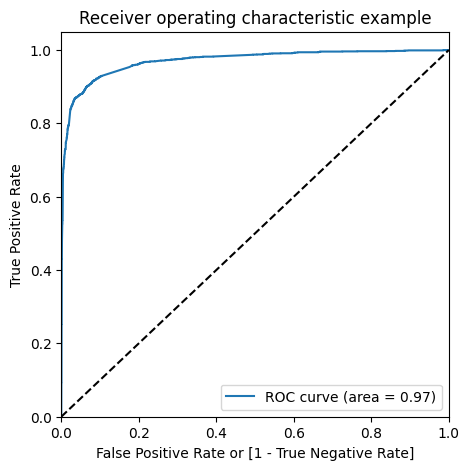

In [2304]:
draw_roc(y_train_pred_final.Actual_Decision, y_train_pred_final.Predicted_Prob)

The ROC Curve should be a value close to 1. Our Predictive Model is good since we are getting almost 0.97 Rsquared

In [2305]:
# But Problem is we need to find an optimum cutoff point in accordance with Bussiness Objectives.Not just assume 0.5 is best. We will try out various threshold points and then choose.

### Finding Optimal Cutoff Point

In [2306]:
# Creating columns with different cutoff points with steps of 0.1
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Predicted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Actual_Decision,Predicted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.024529,7558,0,1,0,0,0,0,0,0,0,0,0
1,1,0.999253,5376,1,1,1,1,1,1,1,1,1,1,1
2,0,0.019192,6468,0,1,0,0,0,0,0,0,0,0,0
3,0,0.038906,1876,0,1,0,0,0,0,0,0,0,0,0
4,0,0.035040,1672,0,1,0,0,0,0,0,0,0,0,0


In [2307]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
threshold_df = pd.DataFrame( columns = ['threshold_prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num_index = [float(x)/10 for x in range(10)]
for i in num_index:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Actual_Decision, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    threshold_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(threshold_df)

     threshold_prob  accuracy  sensitivity  specificity
0.0             0.0  0.359497     1.000000     0.000000
0.1             0.1  0.844511     0.967757     0.775336
0.2             0.2  0.913396     0.922156     0.908480
0.3             0.3  0.919523     0.904192     0.928128
0.4             0.4  0.922504     0.884846     0.943640
0.5             0.5  0.929790     0.869185     0.963806
0.6             0.6  0.927803     0.849378     0.971820
0.7             0.7  0.914224     0.795486     0.980869
0.8             0.8  0.909919     0.777982     0.983971
0.9             0.9  0.891538     0.713035     0.991727


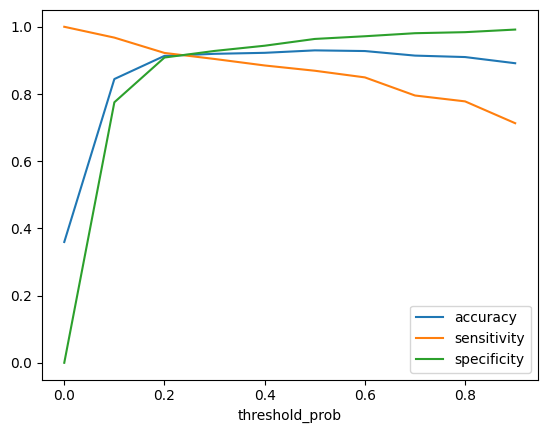

In [2308]:
# Plotting accuracy,sensitivity and specificity for various threshold probabilities.
threshold_df.plot.line(x='threshold_prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [2309]:
# The intersection among the metrics is the ideal point to choose for deciding threshold since this ensures the combined maximization of all 3 entities.
# As observed the value is around 0.3.
# This is also suitable and almost in accordance with business CEO requirement of 80 percent conversion rate ,So ideally only 20 percent people are not potential leads.
# We got a close value of 30 percent people who may not be that important to business.
# We can thus focus on the remaining 70 percent people classified as converted and thus formulate a strategy for people showing similar characteristics as this 70 percent.

In [2310]:
y_train_pred_final

,Actual_Decision,Predicted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.024529,7558,0,1,0,0,0,0,0,0,0,0,0
1,1,0.999253,5376,1,1,1,1,1,1,1,1,1,1,1
2,0,0.019192,6468,0,1,0,0,0,0,0,0,0,0,0
3,0,0.038906,1876,0,1,0,0,0,0,0,0,0,0,0
4,0,0.035040,1672,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6034,0,0.000451,4510,0,1,0,0,0,0,0,0,0,0,0
6035,0,0.036293,9220,0,1,0,0,0,0,0,0,0,0,0
6036,0,0.691457,6854,1,1,1,1,1,1,1,1,0,0,0
6037,0,0.157035,7974,0,1,1,0,0,0,0,0,0,0,0


In [2311]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Predicted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Actual_Decision,Predicted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.024529,7558,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.999253,5376,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.019192,6468,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.038906,1876,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.035040,1672,0,1,0,0,0,0,0,0,0,0,0,0


In [2312]:
# As propbabilities range from 0 to 1 we are multiplying it by 100 and giving a rating ranging from 0 to 100 as lead score.

In [2313]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Predicted_Prob.map( lambda x: round(x*100))

y_train_pred_final[['Prospect ID','Actual_Decision','Predicted_Prob','Final_Predicted','Lead_Score']].head()

,Prospect ID,Actual_Decision,Predicted_Prob,Final_Predicted,Lead_Score
0,7558,0,0.024529,0,2
1,5376,1,0.999253,1,100
2,6468,0,0.019192,0,2
3,1876,0,0.038906,0,4
4,1672,0,0.035040,0,4


In [2314]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Actual_Decision, y_train_pred_final.Final_Predicted)

0.9195230998509687

In [2315]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Actual_Decision, y_train_pred_final.Final_Predicted)
confusion2

array([[3590,  278],
       [ 208, 1963]], dtype=int64)

In [2316]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2317]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9041916167664671

In [2318]:
# Let us calculate specificity
TN / float(TN+FP)

0.9281282316442606

In [2319]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.0718717683557394


In [2320]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8759482373940205


In [2321]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9452343338599263


In [2322]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9309324124321657

In [2323]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8691847075080608

In [2324]:
from sklearn.metrics import precision_score, recall_score

In [2325]:
precision_score(y_train_pred_final.Actual_Decision , y_train_pred_final.Final_Predicted)

0.8759482373940205

In [2326]:
recall_score(y_train_pred_final.Actual_Decision , y_train_pred_final.Final_Predicted)

0.9041916167664671

### Insights:
So we hae a reasonable well performing model. The ROC curve has a value of 0.97, which is also good. For Train Data here are some important performance indicators:
- Accuracy : 91.95%
- Sensitivity : 86.91%
- Specificity : 96.38%
- Precision : 87.59%
- Recall : 90.41%

In [2327]:
# Precision Recall Curve

In [2328]:
from sklearn.metrics import precision_recall_curve

In [2329]:
y_train_pred_final

,Actual_Decision,Predicted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted,Lead_Score
0,0,0.024529,7558,0,1,0,0,0,0,0,0,0,0,0,0,2
1,1,0.999253,5376,1,1,1,1,1,1,1,1,1,1,1,1,100
2,0,0.019192,6468,0,1,0,0,0,0,0,0,0,0,0,0,2
3,0,0.038906,1876,0,1,0,0,0,0,0,0,0,0,0,0,4
4,0,0.035040,1672,0,1,0,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6034,0,0.000451,4510,0,1,0,0,0,0,0,0,0,0,0,0,0
6035,0,0.036293,9220,0,1,0,0,0,0,0,0,0,0,0,0,4
6036,0,0.691457,6854,1,1,1,1,1,1,1,1,0,0,0,1,69
6037,0,0.157035,7974,0,1,1,0,0,0,0,0,0,0,0,0,16


In [2330]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Actual_Decision, y_train_pred_final.Predicted_Prob)

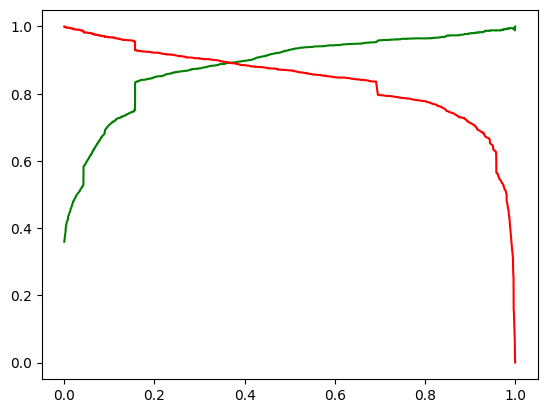

In [2331]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Test Set Predictions and Evaluation

In [2332]:
# #scaling test set

# num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

# X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

# X_test.head()

In [2333]:
X_train_sm

,const,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
7558,1.0,0.226101,1.639837,-0.671295,-0.348495,-0.127096,-0.653957,-0.241577,-0.178265,-0.243109,-0.134942,-0.384553,-0.513214,-0.098475,-0.165500,1.288092,-0.552928
5376,1.0,2.417489,1.639837,-0.671295,-0.348495,-0.127096,1.529153,-0.241577,-0.178265,-0.243109,-0.134942,-0.384553,1.948503,-0.098475,-0.165500,-0.776342,1.808553
6468,1.0,-0.555622,1.639837,-0.671295,-0.348495,-0.127096,1.529153,-0.241577,-0.178265,-0.243109,-0.134942,-0.384553,-0.513214,10.154836,-0.165500,-0.776342,1.808553
1876,1.0,-0.747848,1.639837,-0.671295,-0.348495,-0.127096,-0.653957,-0.241577,-0.178265,-0.243109,-0.134942,-0.384553,-0.513214,-0.098475,-0.165500,-0.776342,-0.552928
1672,1.0,0.018923,-0.609817,1.489659,-0.348495,-0.127096,-0.653957,-0.241577,-0.178265,-0.243109,-0.134942,-0.384553,-0.513214,-0.098475,-0.165500,1.288092,-0.552928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4510,1.0,-0.316406,1.639837,-0.671295,-0.348495,-0.127096,-0.653957,-0.241577,-0.178265,-0.243109,-0.134942,-0.384553,-0.513214,-0.098475,6.042294,-0.776342,-0.552928
9220,1.0,-0.807652,1.639837,-0.671295,-0.348495,-0.127096,1.529153,-0.241577,-0.178265,-0.243109,-0.134942,-0.384553,-0.513214,-0.098475,-0.165500,1.288092,-0.552928
6854,1.0,-0.850369,-0.609817,-0.671295,-0.348495,-0.127096,1.529153,-0.241577,-0.178265,-0.243109,-0.134942,-0.384553,-0.513214,-0.098475,-0.165500,-0.776342,1.808553
7974,1.0,-0.850369,-0.609817,-0.671295,-0.348495,-0.127096,-0.653957,-0.241577,-0.178265,-0.243109,-0.134942,-0.384553,-0.513214,-0.098475,-0.165500,-0.776342,-0.552928


In [2334]:
#scaling test set

cols_2=X_test.columns

X_test[cols_2] = scaler.fit_transform(X_test)

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,...,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3502,-0.293768,2.676717,-0.655896,0.152252,1.557296,1.166653,-1.012994,-0.262683,-0.615230,-0.074106,1.450254,-0.519482,-0.345703,-0.221265,-0.10748,-0.127064,-0.235702,-0.18835,-0.17822,1.275074,-0.109819,-0.031528,-0.363451,-0.261601,-0.641368,...,-0.173721,-0.092265,-0.083666,-0.083666,-0.252823,-0.132988,-0.125032,-0.086624,-0.390939,-0.537934,-0.077421,-0.054663,-0.170664,-0.063151,0.570088,-0.222497,-0.198030,-0.29675,-0.10748,-0.145939,1.470271,-0.741905,-0.14235,-0.186932,-0.561676
6962,-0.293768,0.546092,0.713020,-0.420806,1.557296,-0.857153,0.987173,-0.262683,1.625409,-0.074106,-0.689535,-0.519482,-0.345703,-0.221265,-0.10748,-0.127064,-0.235702,-0.18835,-0.17822,1.275074,-0.109819,-0.031528,-0.363451,-0.261601,-0.641368,...,-0.173721,-0.092265,-0.083666,-0.083666,-0.252823,-0.132988,-0.125032,-0.086624,-0.390939,-0.537934,-0.077421,-0.054663,-0.170664,-0.063151,-1.754116,-0.222497,5.049752,-0.29675,-0.10748,-0.145939,1.470271,-0.741905,-0.14235,-0.186932,-0.561676
5122,-0.293768,0.972217,-0.653799,-0.470637,1.557296,-0.857153,0.987173,-0.262683,1.625409,-0.074106,-0.689535,-0.519482,-0.345703,-0.221265,-0.10748,-0.127064,-0.235702,-0.18835,-0.17822,1.275074,-0.109819,-0.031528,-0.363451,-0.261601,-0.641368,...,-0.173721,-0.092265,-0.083666,-0.083666,-0.252823,-0.132988,-0.125032,-0.086624,-0.390939,-0.537934,-0.077421,-0.054663,-0.170664,-0.063151,0.570088,-0.222497,-0.198030,-0.29675,-0.10748,-0.145939,1.470271,-0.741905,-0.14235,-0.186932,-0.561676
5589,-0.293768,0.546092,-0.115038,1.242309,-0.642139,1.166653,-1.012994,-0.262683,-0.615230,-0.074106,1.450254,-0.519482,-0.345703,-0.221265,-0.10748,-0.127064,-0.235702,-0.18835,-0.17822,1.275074,-0.109819,-0.031528,-0.363451,-0.261601,-0.641368,...,-0.173721,-0.092265,-0.083666,-0.083666,-0.252823,-0.132988,-0.125032,-0.086624,-0.390939,1.858965,-0.077421,-0.054663,-0.170664,-0.063151,-1.754116,4.494441,-0.198030,-0.29675,-0.10748,-0.145939,1.470271,-0.741905,-0.14235,-0.186932,-0.561676
5497,-0.293768,-0.732283,-0.024895,-0.626360,-0.642139,-0.857153,0.987173,-0.262683,1.625409,-0.074106,-0.689535,-0.519482,-0.345703,-0.221265,-0.10748,-0.127064,4.242641,-0.18835,-0.17822,-0.784268,-0.109819,-0.031528,-0.363451,-0.261601,-0.641368,...,-0.173721,-0.092265,-0.083666,-0.083666,-0.252823,-0.132988,-0.125032,-0.086624,-0.390939,-0.537934,-0.077421,-0.054663,-0.170664,-0.063151,0.570088,-0.222497,-0.198030,-0.29675,-0.10748,-0.145939,-0.680147,1.347881,-0.14235,-0.186932,-0.561676


In [2335]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
3502,-0.655896,-0.615230,1.450254,-0.345703,-0.127064,-0.641368,-0.230970,-0.173721,-0.252823,-0.132988,-0.390939,-0.537934,-0.077421,-0.170664,-0.741905,-0.561676
6962,0.713020,1.625409,-0.689535,-0.345703,-0.127064,-0.641368,4.329561,-0.173721,-0.252823,-0.132988,-0.390939,-0.537934,-0.077421,-0.170664,-0.741905,-0.561676
5122,-0.653799,1.625409,-0.689535,-0.345703,-0.127064,-0.641368,-0.230970,-0.173721,-0.252823,-0.132988,-0.390939,-0.537934,-0.077421,-0.170664,-0.741905,-0.561676
5589,-0.115038,-0.615230,1.450254,-0.345703,-0.127064,-0.641368,-0.230970,-0.173721,-0.252823,-0.132988,-0.390939,1.858965,-0.077421,-0.170664,-0.741905,-0.561676
5497,-0.024895,1.625409,-0.689535,-0.345703,-0.127064,-0.641368,-0.230970,-0.173721,-0.252823,-0.132988,-0.390939,-0.537934,-0.077421,-0.170664,1.347881,-0.561676


In [2336]:
X_test_sm = sm.add_constant(X_test)

In [2337]:
X_test_sm

,const,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
3502,1.0,-0.655896,-0.615230,1.450254,-0.345703,-0.127064,-0.641368,-0.230970,-0.173721,-0.252823,-0.132988,-0.390939,-0.537934,-0.077421,-0.170664,-0.741905,-0.561676
6962,1.0,0.713020,1.625409,-0.689535,-0.345703,-0.127064,-0.641368,4.329561,-0.173721,-0.252823,-0.132988,-0.390939,-0.537934,-0.077421,-0.170664,-0.741905,-0.561676
5122,1.0,-0.653799,1.625409,-0.689535,-0.345703,-0.127064,-0.641368,-0.230970,-0.173721,-0.252823,-0.132988,-0.390939,-0.537934,-0.077421,-0.170664,-0.741905,-0.561676
5589,1.0,-0.115038,-0.615230,1.450254,-0.345703,-0.127064,-0.641368,-0.230970,-0.173721,-0.252823,-0.132988,-0.390939,1.858965,-0.077421,-0.170664,-0.741905,-0.561676
5497,1.0,-0.024895,1.625409,-0.689535,-0.345703,-0.127064,-0.641368,-0.230970,-0.173721,-0.252823,-0.132988,-0.390939,-0.537934,-0.077421,-0.170664,1.347881,-0.561676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,1.0,-0.863434,-0.615230,-0.689535,-0.345703,-0.127064,-0.641368,-0.230970,-0.173721,-0.252823,-0.132988,-0.390939,-0.537934,-0.077421,-0.170664,-0.741905,-0.561676
7562,1.0,-0.863434,-0.615230,-0.689535,-0.345703,-0.127064,-0.641368,-0.230970,-0.173721,-0.252823,-0.132988,-0.390939,-0.537934,-0.077421,-0.170664,-0.741905,-0.561676
153,1.0,-0.349829,1.625409,-0.689535,-0.345703,-0.127064,-0.641368,-0.230970,-0.173721,-0.252823,-0.132988,2.557943,-0.537934,-0.077421,-0.170664,1.347881,-0.561676
6992,1.0,0.297943,-0.615230,1.450254,-0.345703,-0.127064,-0.641368,-0.230970,-0.173721,-0.252823,-0.132988,-0.390939,-0.537934,-0.077421,-0.170664,-0.741905,-0.561676


In [2338]:
X_test_sm.shape

(2014, 17)

### PREDICTIONS ON TEST SET

In [2339]:
y_test_pred = res.predict(X_test_sm)

In [2340]:
y_test_pred[:10]

3502    0.070237
6962    0.010707
5122    0.040857
5589    0.932678
5497    0.018183
3288    0.951185
8468    0.391160
6431    0.007632
6384    0.995630
9156    0.013815
dtype: float64

In [2341]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [2342]:
# Let's see the head
y_pred_1.head()

,0
3502,0.070237
6962,0.010707
5122,0.040857
5589,0.932678
5497,0.018183


In [2343]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [2344]:
y_test_df

,Converted
3502,0
6962,0
5122,0
5589,1
5497,0
...,...
1028,0
7562,0
153,0
6992,0


In [2345]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [2346]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [2352]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [2353]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3502,0.070237
1,0,6962,0.010707
2,0,5122,0.040857
3,1,5589,0.932678
4,0,5497,0.018183


In [2354]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Actual_Decision',0 :'Predicted_Prob'})

In [2355]:
y_pred_final.head()

,Actual_Decision,Prospect ID,Predicted_Prob
0,0,3502,0.070237
1,0,6962,0.010707
2,0,5122,0.040857
3,1,5589,0.932678
4,0,5497,0.018183


In [2357]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Actual_Decision','Predicted_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Predicted_Prob.map( lambda x: round(x*100))

In [ ]:
Actual_Decision	Predicted_Prob	Prospect ID	Predicted

In [2358]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Actual_Decision,Predicted_Prob,Lead_Score
0,3502,0,0.070237,7
1,6962,0,0.010707,1
2,5122,0,0.040857,4
3,5589,1,0.932678,93
4,5497,0,0.018183,2


In [ ]:
# Renaming Columns

In [2360]:
y_pred_final['Final_Predicted'] = y_pred_final.Predicted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [2361]:
y_pred_final = y_pred_final[['Prospect ID','Actual_Decision','Predicted_Prob','Final_Predicted','Lead_Score']]

In [2362]:
y_pred_final.head()

,Prospect ID,Actual_Decision,Predicted_Prob,Final_Predicted,Lead_Score
0,3502,0,0.070237,0,7
1,6962,0,0.010707,0,1
2,5122,0,0.040857,0,4
3,5589,1,0.932678,1,93
4,5497,0,0.018183,0,2


In [2364]:
# Accuracy Check
metrics.accuracy_score(y_pred_final.Actual_Decision, y_pred_final.Final_Predicted)

0.9145978152929494

In [2365]:
confusion2 = metrics.confusion_matrix(y_pred_final.Actual_Decision, y_pred_final.Final_Predicted)
confusion2

array([[1175,  104],
       [  68,  667]], dtype=int64)

In [2366]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2367]:
# Sensitivity
TP / float(TP+FN)

0.9074829931972789

In [2368]:
# Specificity
TN / float(TN+FP)

0.9186864738076622

In [2370]:
precision_score(y_pred_final.Actual_Decision, y_pred_final.Final_Predicted)

0.8651102464332037

In [2371]:
recall_score(y_pred_final.Actual_Decision, y_pred_final.Final_Predicted)

0.9074829931972789

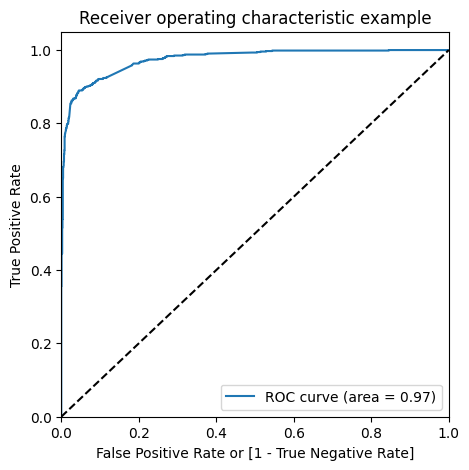

In [2374]:
draw_roc(y_pred_final.Actual_Decision, y_pred_final.Predicted_Prob)

### Insights:
So we hae a reasonable well performing model. The ROC curve has a value of 0.97, which is also good. For Test Data here are some important performance indicators:
- Accuracy : 91.45%
- Sensitivity : 90.74%
- Specificity : 91.86%
- Precision : 86.51%
- Recall : 90.74%

# Project Conclusion

## Final Insights and Train test Performance Comparison:

Let us compare the values obtained for Train & Test:

### <u> Train Data: </u>
- Accuracy : 91.95%
- Sensitivity : 86.91%
- Specificity : 96.38%
- Precision : 87.59%
- Recall : 90.41%

### <u> Test Data: </u>
- Accuracy : 91.45%
- Sensitivity : 90.74%
- Specificity : 91.86%
- Precision : 86.51%
- Recall : 90.74%

## Final Outputs
- We can see above that train and test sets have similar performances and thus there is no significant overfitting or performance loss.
    we can assume model can be relied on for real world data now.
- Since threshold was found to be around 0.3 so all persons above that or lead score 30 should be in our priority list and customized mails,ads and services and discounts can be offered to them
    to ensure conversion from them.